# Data wrangling: pollution in one state
Plan to explore a single state and then venture out to work on regions
# Importing libraries

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

#Load data

In [206]:
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')


def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

# Explore and clean aqi by county dataset

In [207]:
# work with one state massachusetts 2019

print(daily_aqi_by_county_2019.columns)

print(daily_aqi_by_county_2017.loc[daily_aqi_by_county_2019['State Name'].str.startswith('Mass')])

mass_aqi_19 = daily_aqi_by_county_2019['State Code'] == 25

print(daily_aqi_by_county_2019.loc[mass_aqi_19])

mass_aqi_19 = pd.DataFrame(daily_aqi_by_county_2019[mass_aqi_19])
mass_aqi_19.drop(['State Name'], axis=1, inplace=True)
mass_aqi_19.head()

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
           State Name county Name  State Code  County Code        Date  AQI  \
133919       Maryland  Washington          24           43  2017-03-26   33   
133920       Maryland  Washington          24           43  2017-03-27   34   
133921       Maryland  Washington          24           43  2017-03-28   55   
133922       Maryland  Washington          24           43  2017-03-29   41   
133923       Maryland  Washington          24           43  2017-03-30   37   
...               ...         ...         ...          ...         ...  ...   
138628  Massachusetts   Worcester          25           27  2017-04-09   47   
138629  Massachusetts   Worcester          25           27  2017-04-10   87   
138630  Massachusetts   Worcester          25           27  2017-04-11   97   
138631  Massa

,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
133919,Barnstable,25,1,2019-01-01,33,Good,Ozone,25-001-0002,1
133920,Barnstable,25,1,2019-01-02,35,Good,Ozone,25-001-0002,1
133921,Barnstable,25,1,2019-01-03,36,Good,Ozone,25-001-0002,1
133922,Barnstable,25,1,2019-01-04,26,Good,Ozone,25-001-0002,1
133923,Barnstable,25,1,2019-01-05,37,Good,Ozone,25-001-0002,1


       State Code  County Code          AQI  Number of Sites Reporting
count      4714.0  4714.000000  4714.000000                4714.000000
mean         25.0    13.645736    38.623250                   1.677980
std           0.0     8.242896    10.589007                   0.732266
min          25.0     1.000000     2.000000                   1.000000
25%          25.0     7.000000    32.000000                   1.000000
50%          25.0    13.000000    38.000000                   2.000000
75%          25.0    21.000000    44.000000                   2.000000
max          25.0    27.000000   126.000000                   3.000000


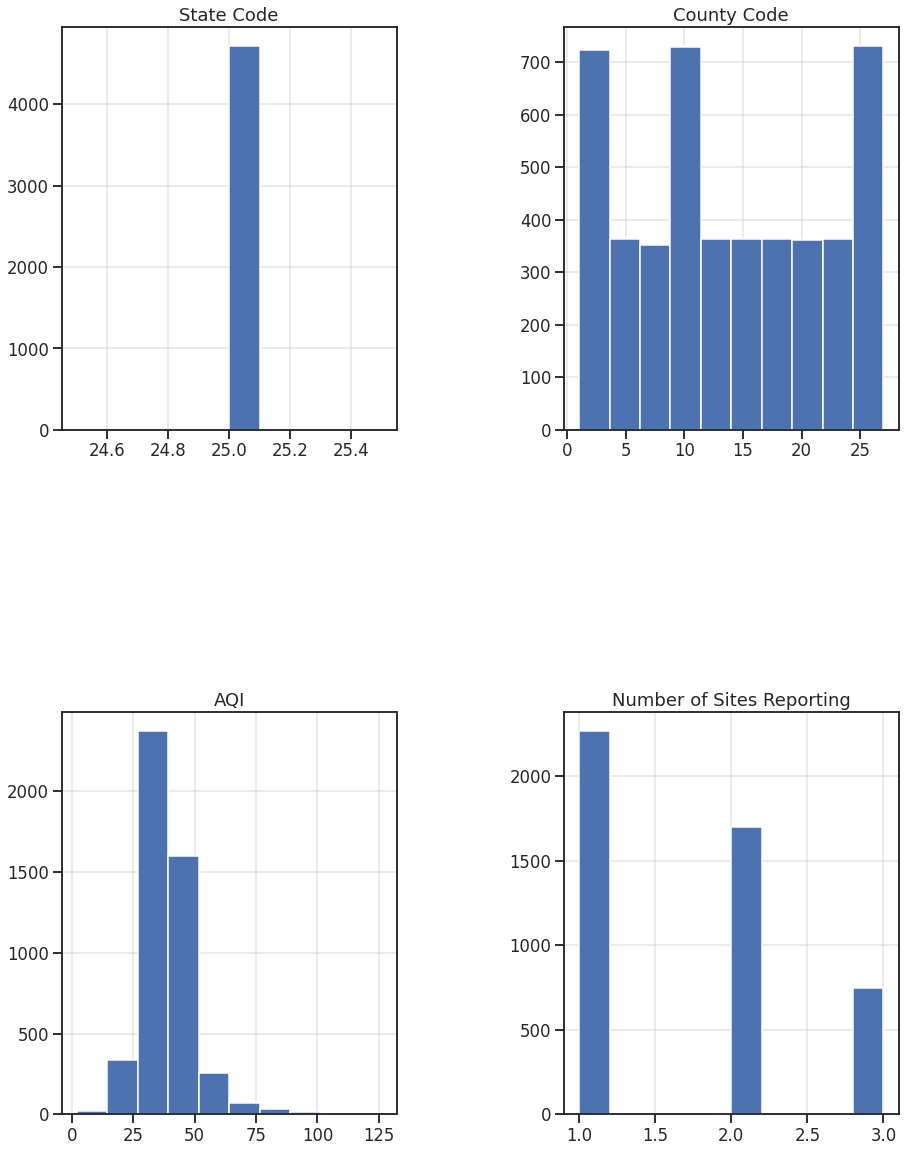

In [208]:
# klib.dist_plot(mass_aqi_19)

print(mass_aqi_19.describe())

mass_aqi_19.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

<BarContainer object of 4714 artists>

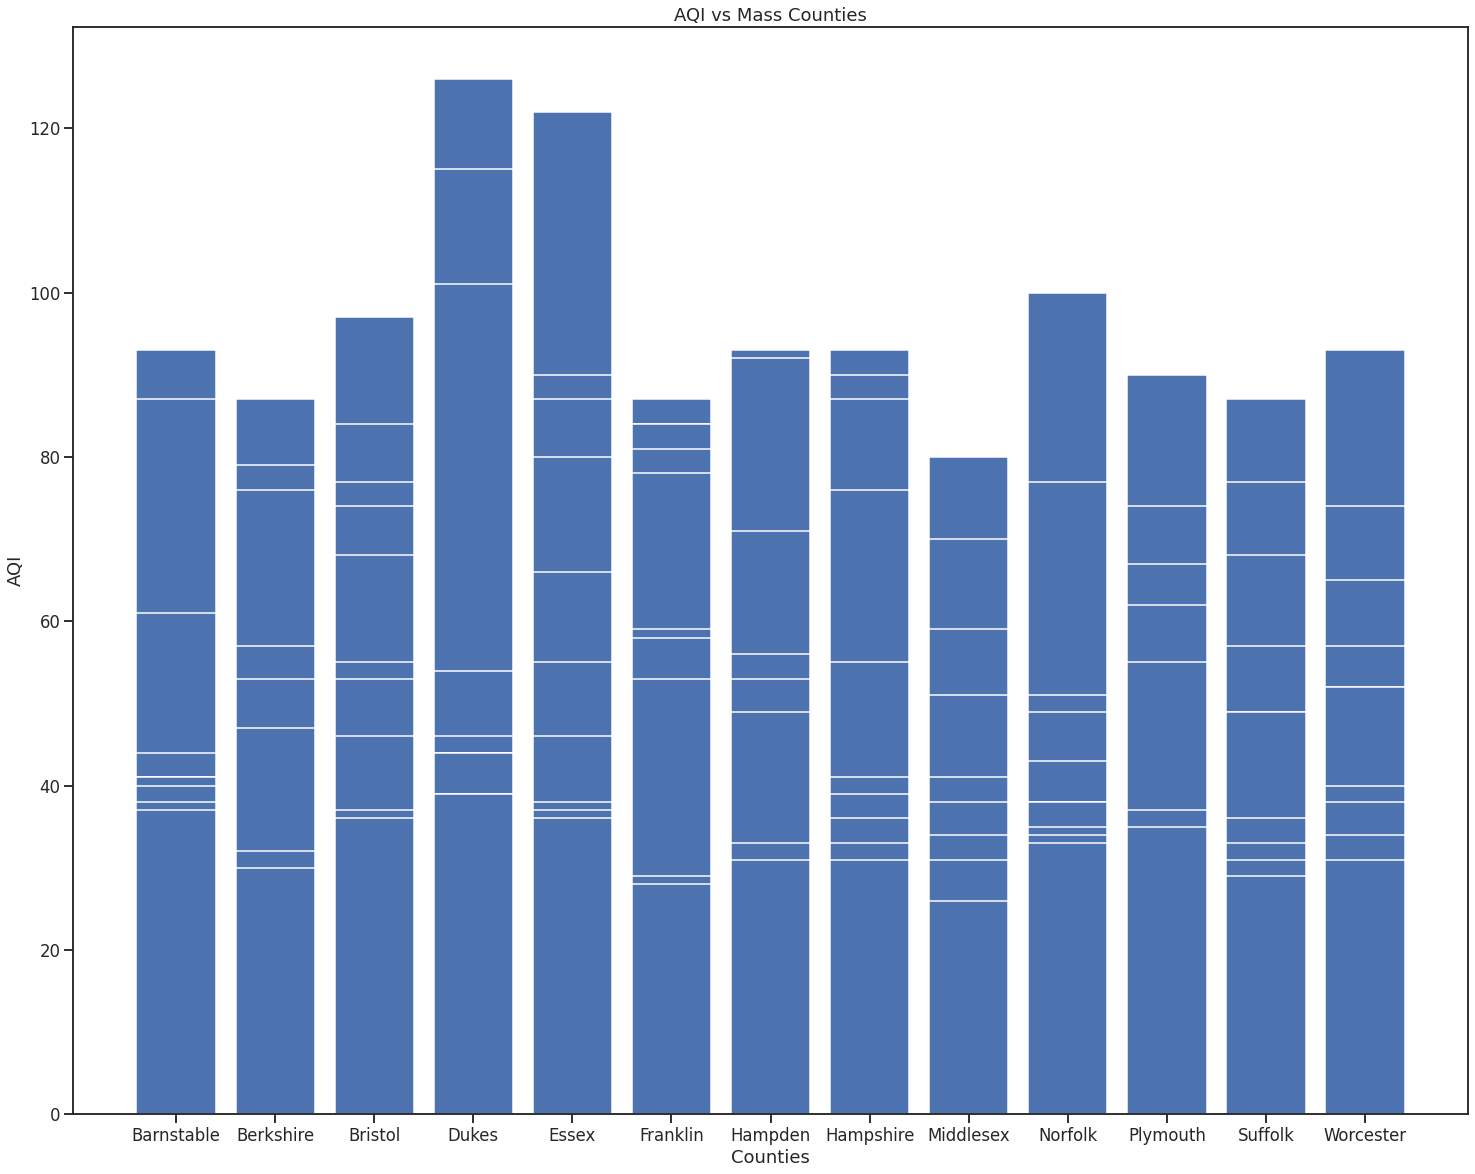

In [209]:
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(mass_aqi_19['county Name'], mass_aqi_19['AQI'])

AQI follows a relative normal distro
no concerning outliers
no negative values

<BarContainer object of 13 artists>

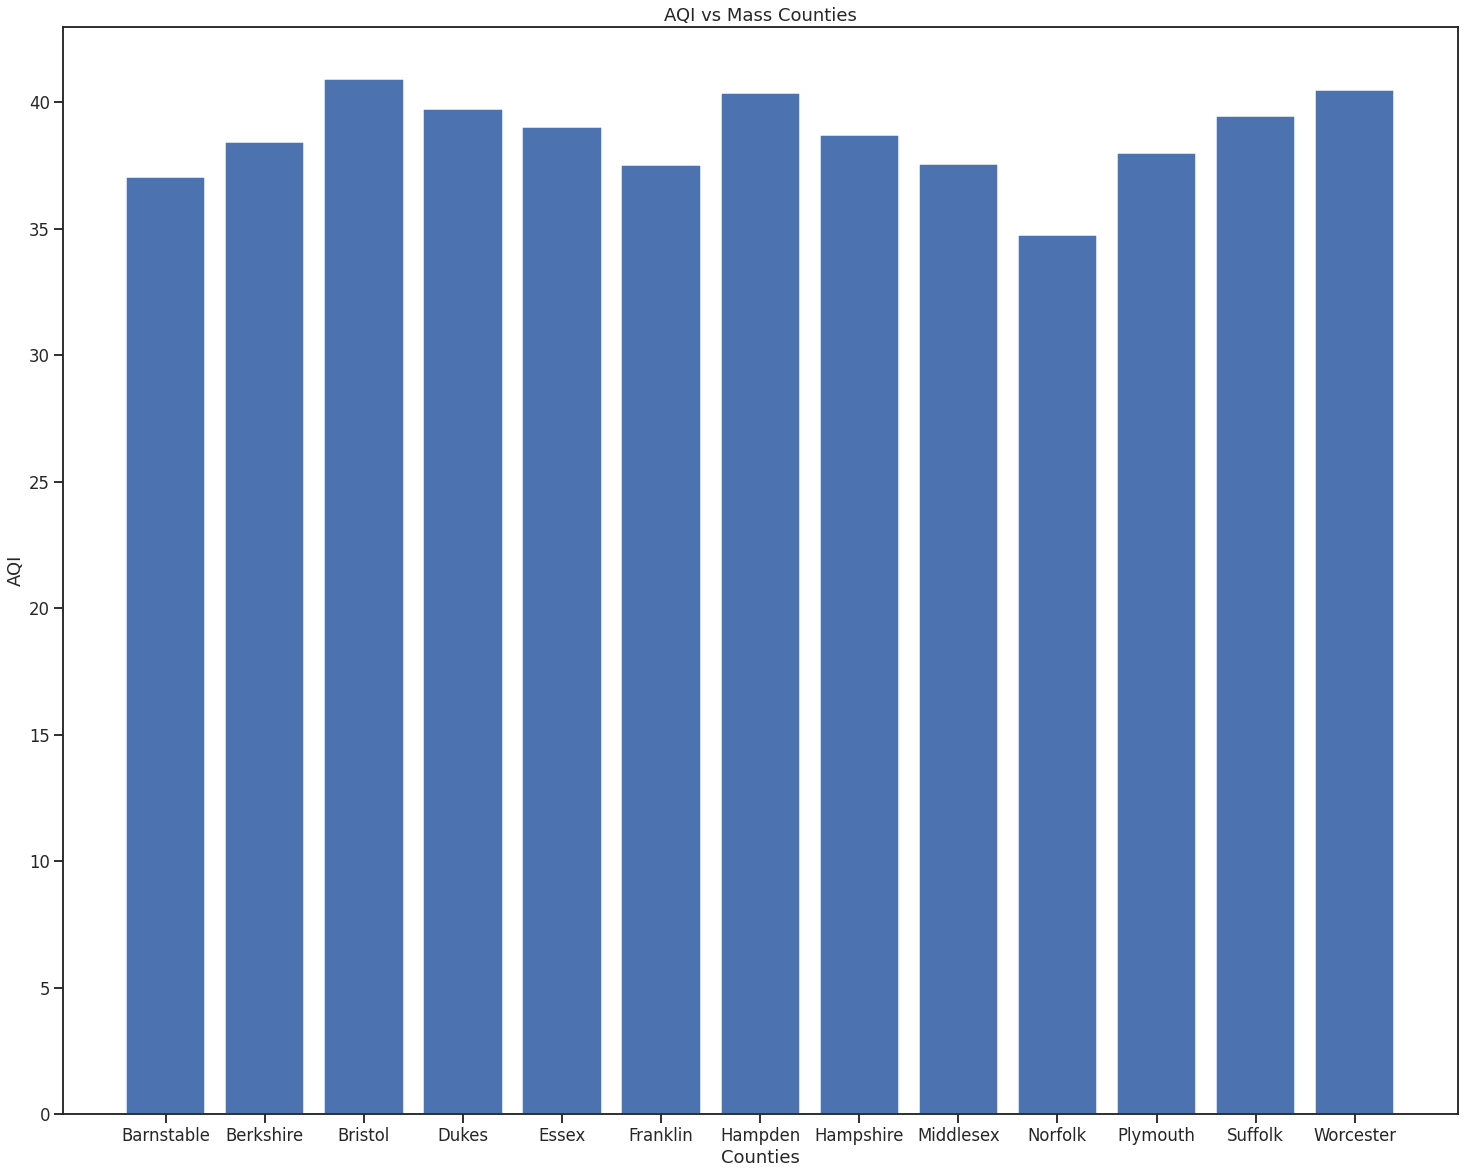

In [210]:
# bar plot of average aqi by county

mean_mass_AQI = mass_aqi_19.groupby('county Name')[['AQI']].mean()
plt.subplots(figsize=(25,20))
plt.xlabel('Counties')
plt.ylabel('AQI')
plt.title('AQI vs Mass Counties')
plt.bar(mean_mass_AQI.index, mean_mass_AQI['AQI'])

In [211]:
# check for missing data in mass_aqi_19

mass_aqi_19.isna().sum()

county Name                  0
State Code                   0
County Code                  0
Date                         0
AQI                          0
Category                     0
Defining Parameter           0
Defining Site                0
Number of Sites Reporting    0
dtype: int64

In [212]:
max = mass_aqi_19.AQI == mass_aqi_19.AQI.max()
min = mass_aqi_19.AQI == mass_aqi_19.AQI.min()
display(mass_aqi_19.loc[max | min])

# check what are the defining parameters
mass_aqi_19['Defining Parameter'].unique()

,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
135195,Dukes,25,7,2019-07-20,126,Unhealthy for Sensitive Groups,Ozone,25-007-0001,1
138206,Suffolk,25,25,2019-10-31,2,Good,CO,25-025-0042,1


array(['Ozone', 'PM2.5', 'NO2', 'CO'], dtype=object)

# Explore and clean income by county data set 2019


In [213]:
print(annual_income_by_county.columns)
dropcol = ['IndustryClassification', 'Description', 'Unit', 'TableName']

county_income_2017_2019 = remove_col(annual_income_by_county, range(1969, 2017))
county_income_2017_2019 = remove_col(county_income_2017_2019, dropcol)
county_income_2017_2019.columns

county_income_2017_2019.drop(county_income_2017_2019.tail(4).index, inplace=True)
county_income_2017_2019
# use to remove years that we are not interested in
# also remove last 4 rows which were not row data
# 1 is personal income, 2 is population of county, 3 per capital income

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')


,GeoFIPS,GeoName,Region,LineCode,2017,2018,2019
0,"""00000""",United States,,1.0,16937582000,17839255000,18542262000
1,"""00000""",United States,,2.0,324985539,326687501,328239523
2,"""00000""",United States,,3.0,52118,54606,56490
3,"""01000""",Alabama,5,1.0,199999756,208752683,216449038
4,"""01000""",Alabama,5,2.0,4874486,4887681,4903185
...,...,...,...,...,...,...,...
9589,"""97000""",Rocky Mountain,7,2.0,12062055,12233639,12399296
9590,"""97000""",Rocky Mountain,7,3.0,49991,52936,54873
9591,"""98000""",Far West,8,1.0,3279057722,3472097346,3634009401
9592,"""98000""",Far West,8,2.0,56059482,56350416,56572426


In [214]:
# change income values to float
county_income_2017_2019['2017'] = pd.to_numeric(county_income_2017_2019['2017'], downcast='float', errors='coerce')
county_income_2017_2019['2018'] =pd.to_numeric(county_income_2017_2019['2018'], downcast='float', errors='coerce')
county_income_2017_2019['2019'] =pd.to_numeric(county_income_2017_2019['2019'], downcast='float', errors='coerce')

county_income_2017_2019.dtypes

GeoFIPS      object
GeoName      object
Region       object
LineCode    float64
2017        float32
2018        float32
2019        float32
dtype: object

In [215]:
print(county_income_2017_2019.columns)
county_income_2017_2019

# get rid of " and space char in GeoFIPS
county_income_2017_2019['GeoFIPS'].replace(r'[" ]', '', regex=True, inplace=True)

county_income_2017_2019

Index(['GeoFIPS', 'GeoName', 'Region', 'LineCode', '2017', '2018', '2019'], dtype='object')


,GeoFIPS,GeoName,Region,LineCode,2017,2018,2019
0,00000,United States,,1.0,1.693758e+10,1.783926e+10,1.854226e+10
1,00000,United States,,2.0,3.249855e+08,3.266875e+08,3.282395e+08
2,00000,United States,,3.0,5.211800e+04,5.460600e+04,5.649000e+04
3,01000,Alabama,5,1.0,1.999998e+08,2.087527e+08,2.164490e+08
4,01000,Alabama,5,2.0,4.874486e+06,4.887681e+06,4.903185e+06
...,...,...,...,...,...,...,...
9589,97000,Rocky Mountain,7,2.0,1.206206e+07,1.223364e+07,1.239930e+07
9590,97000,Rocky Mountain,7,3.0,4.999100e+04,5.293600e+04,5.487300e+04
9591,98000,Far West,8,1.0,3.279058e+09,3.472097e+09,3.634009e+09
9592,98000,Far West,8,2.0,5.605948e+07,5.635042e+07,5.657242e+07


In [216]:
# find all Mass values
mass = county_income_2017_2019.GeoFIPS.str.startswith('25')
county_mass_incomes = county_income_2017_2019.loc[mass]

# remove the total mass stats
county_mass_incomes.drop(county_mass_incomes.head(3).index, inplace=True)
county_mass_incomes
# mass

/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GeoFIPS,GeoName,Region,LineCode,2017,2018,2019
3789,25001,"Barnstable, MA",1,1.0,15181333.0,15949290.0,16492955.0
3790,25001,"Barnstable, MA",1,2.0,213581.0,213471.0,212990.0
3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0
3792,25003,"Berkshire, MA",1,1.0,6873118.0,7132374.0,7284151.0
3793,25003,"Berkshire, MA",1,2.0,126353.0,125901.0,124944.0
3794,25003,"Berkshire, MA",1,3.0,54396.0,56651.0,58299.0
3795,25005,"Bristol, MA",1,1.0,29045780.0,30377836.0,31492832.0
3796,25005,"Bristol, MA",1,2.0,560941.0,564092.0,565217.0
3797,25005,"Bristol, MA",1,3.0,51780.0,53853.0,55718.0
3798,25007,"Dukes, MA",1,1.0,1551092.0,1692326.0,1750465.0


In [217]:
county_mass_incomes.shape
# small distribution of incomes for mass and counties

(42, 7)

In [218]:
# separate personal income, pop. and per capita income
mass_personal_inc = county_mass_incomes.loc[county_mass_incomes.LineCode == 1.0]
mass_pop = county_mass_incomes.loc[county_mass_incomes.LineCode == 2.0]
mass_per_capita = county_mass_incomes.loc[county_mass_incomes.LineCode == 3.0]

In [219]:
mass_personal_inc.rename(columns={'2017':'2017_personal_income', '2018':'2018_personal_income', '2019':'2019_personal_income'}, inplace=True)
mass_pop.rename(columns={'2017':'2017_pop', '2018':'2018_pop', '2019':'2019_pop'}, inplace=True)
mass_per_capita.rename(columns={'2017':'2017_per_capita', '2018':'2018_per_capita', '2019':'2019_per_capita'}, inplace=True)

/home/wkc/.local/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [220]:
mass_personal_inc.reset_index(inplace=True)
mass_pop.reset_index(inplace=True)
mass_per_capita.reset_index(inplace=True)

personal_inc_cols_to_use = mass_personal_inc.columns.difference(mass_per_capita.columns)
pop_cols_to_use = mass_pop.columns.difference(mass_per_capita.columns)

mass_incomes = pd.concat([mass_per_capita, mass_personal_inc[personal_inc_cols_to_use], mass_pop[pop_cols_to_use]], axis=1)
display(mass_incomes)

,index,GeoFIPS,GeoName,Region,LineCode,2017_per_capita,2018_per_capita,2019_per_capita,2017_personal_income,2018_personal_income,2019_personal_income,2017_pop,2018_pop,2019_pop
0,3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,16492955.0,213581.0,213471.0,212990.0
1,3794,25003,"Berkshire, MA",1,3.0,54396.0,56651.0,58299.0,6873118.0,7132374.0,7284151.0,126353.0,125901.0,124944.0
2,3797,25005,"Bristol, MA",1,3.0,51780.0,53853.0,55718.0,29045780.0,30377836.0,31492832.0,560941.0,564092.0,565217.0
3,3800,25007,"Dukes, MA",1,3.0,89602.0,97659.0,100996.0,1551092.0,1692326.0,1750465.0,17311.0,17329.0,17332.0
4,3803,25009,"Essex, MA",1,3.0,64629.0,67646.0,69981.0,50698536.0,53317796.0,55217692.0,784453.0,788183.0,789034.0
5,3806,25011,"Franklin, MA",1,3.0,52821.0,54817.0,56793.0,3729416.0,3870676.0,3985726.0,70605.0,70611.0,70180.0
6,3809,25013,"Hampden, MA",1,3.0,49631.0,51736.0,53248.0,23212582.0,24232556.0,24833290.0,467705.0,468388.0,466372.0
7,3812,25015,"Hampshire, MA",1,3.0,51065.0,52910.0,54867.0,8225319.0,8525830.0,8824292.0,161077.0,161139.0,160830.0
8,3815,25017,"Middlesex, MA",1,3.0,79970.0,84367.0,87192.0,128268000.0,135701600.0,140526816.0,1603943.0,1608470.0,1611699.0
9,3818,25019,"Nantucket, MA",1,3.0,119211.0,132886.0,136204.0,1335764.0,1488055.0,1552588.0,11205.0,11198.0,11399.0


# Examine distributions for outliers, also check for missing values


GeoFIPS     0
GeoName     0
Region      0
LineCode    0
2017        0
2018        0
2019        0
dtype: int64


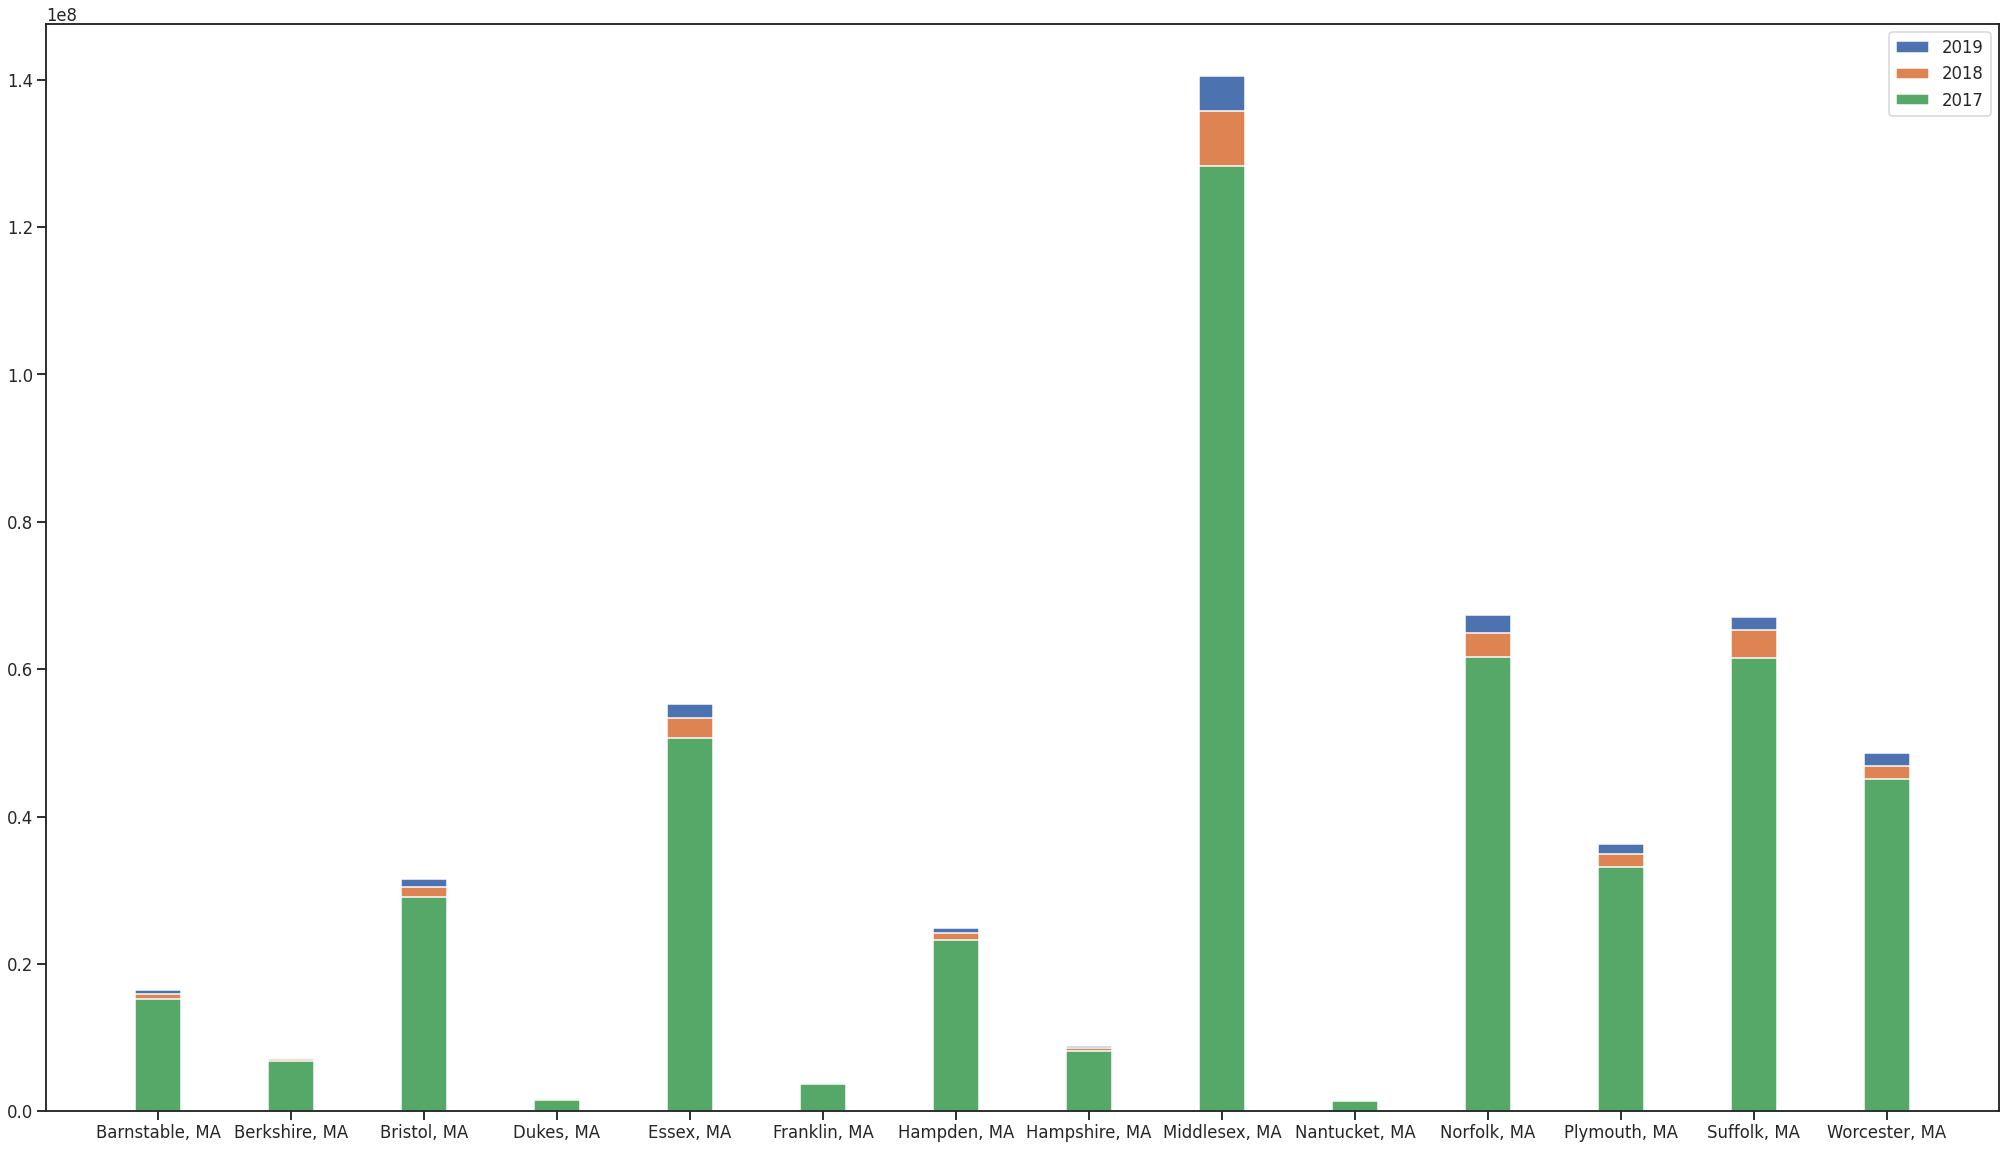

In [221]:
# distribution of personal incomes in mass
print(county_mass_incomes.isnull().sum())
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(35,20))

recs1 = ax.bar(mass_personal_inc.GeoName, mass_personal_inc['2019_personal_income'], width, label='2019')
recs2 = ax.bar(mass_personal_inc.GeoName, mass_personal_inc['2018_personal_income'], width, label='2018')
recs3 = ax.bar(mass_personal_inc.GeoName, mass_personal_inc['2017_personal_income'], width, label='2017')

ax.legend()
plt.show()
# surprised that middlesex makes more than suffolk county for personal income


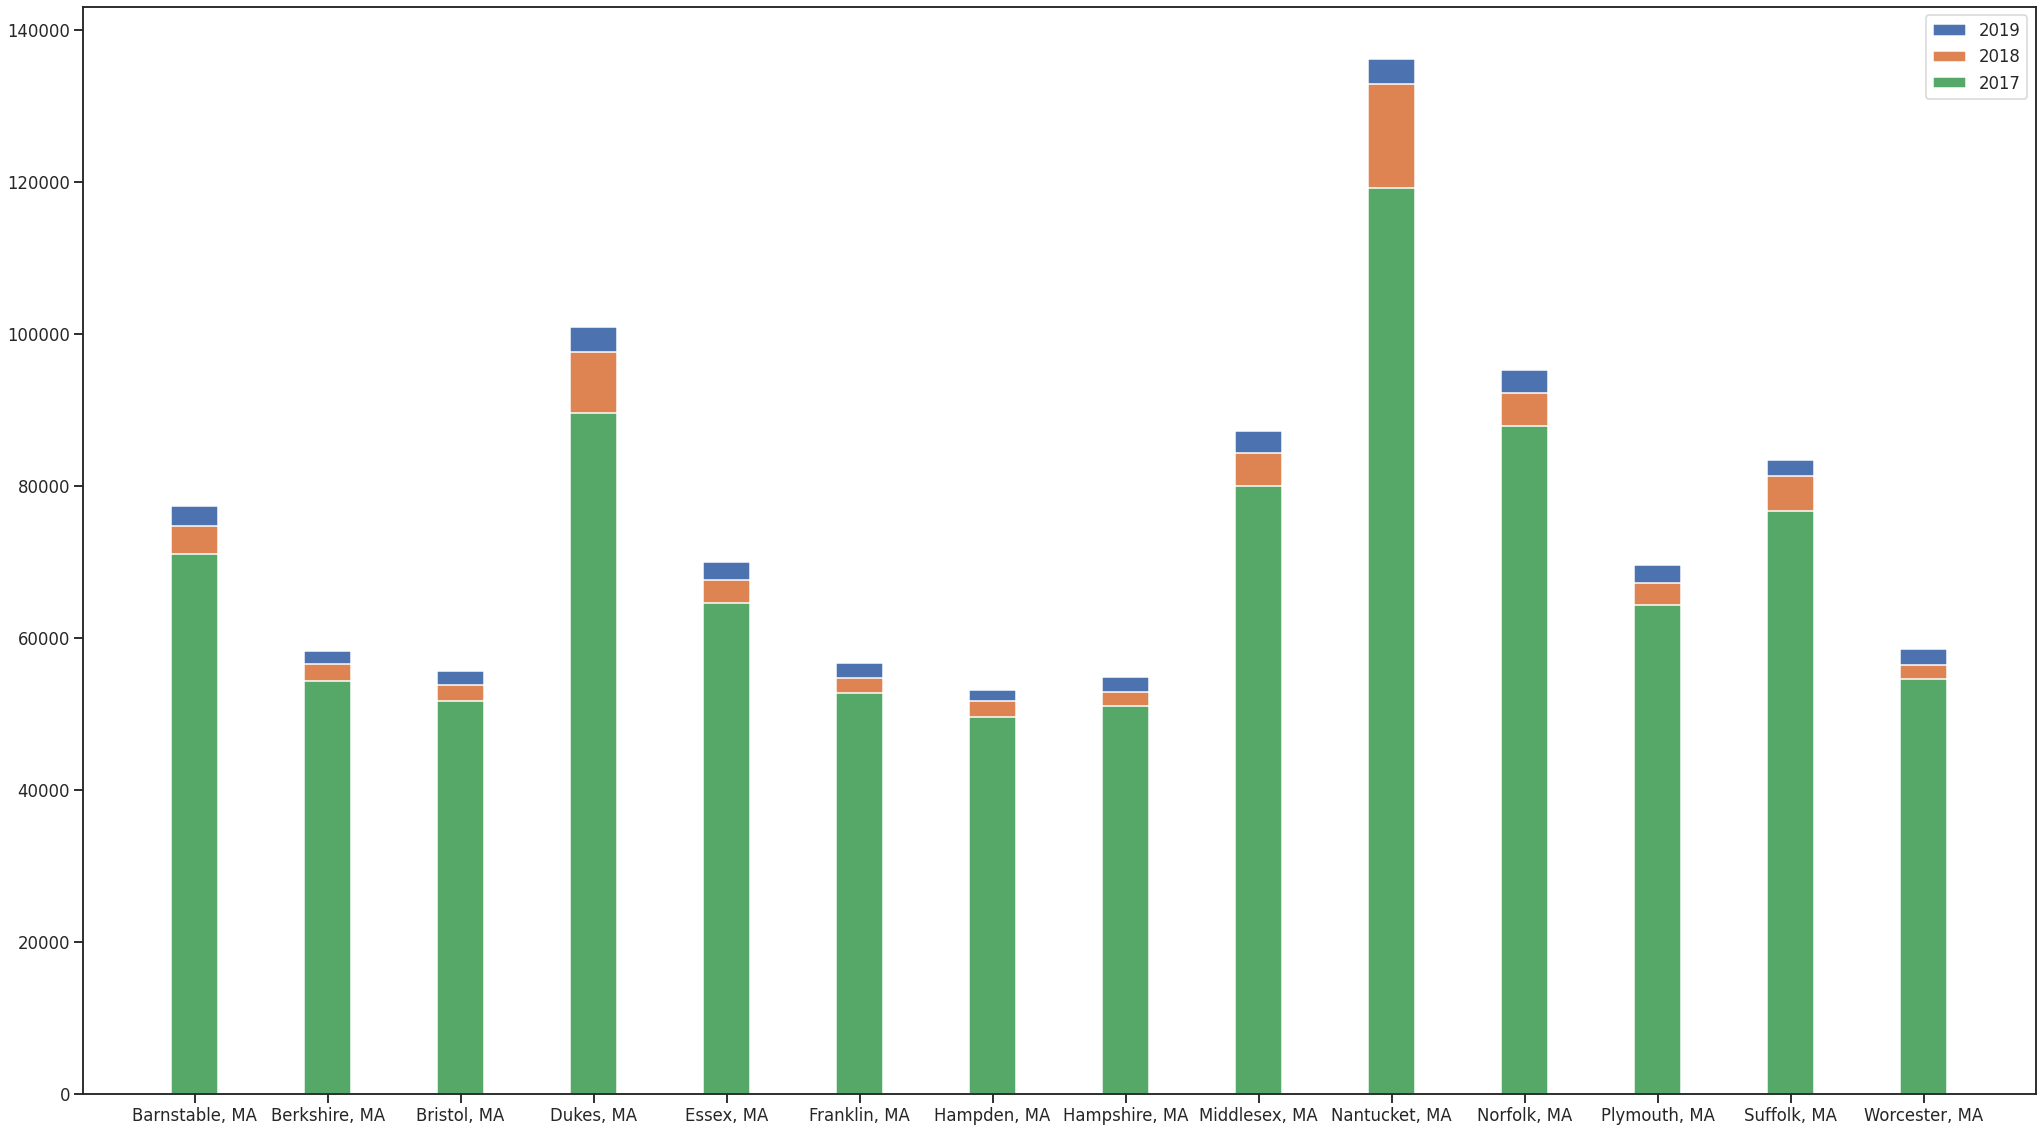

In [222]:
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(35,20))

recs1 = ax.bar(mass_per_capita.GeoName, mass_per_capita['2019_per_capita'], width, label='2019')
recs2 = ax.bar(mass_per_capita.GeoName, mass_per_capita['2018_per_capita'], width, label='2018')
recs3 = ax.bar(mass_per_capita.GeoName, mass_per_capita['2017_per_capita'], width, label='2017')

ax.legend()
plt.show()
# when looking at per capita of pop of county; it appears that nantucket has highest personal income

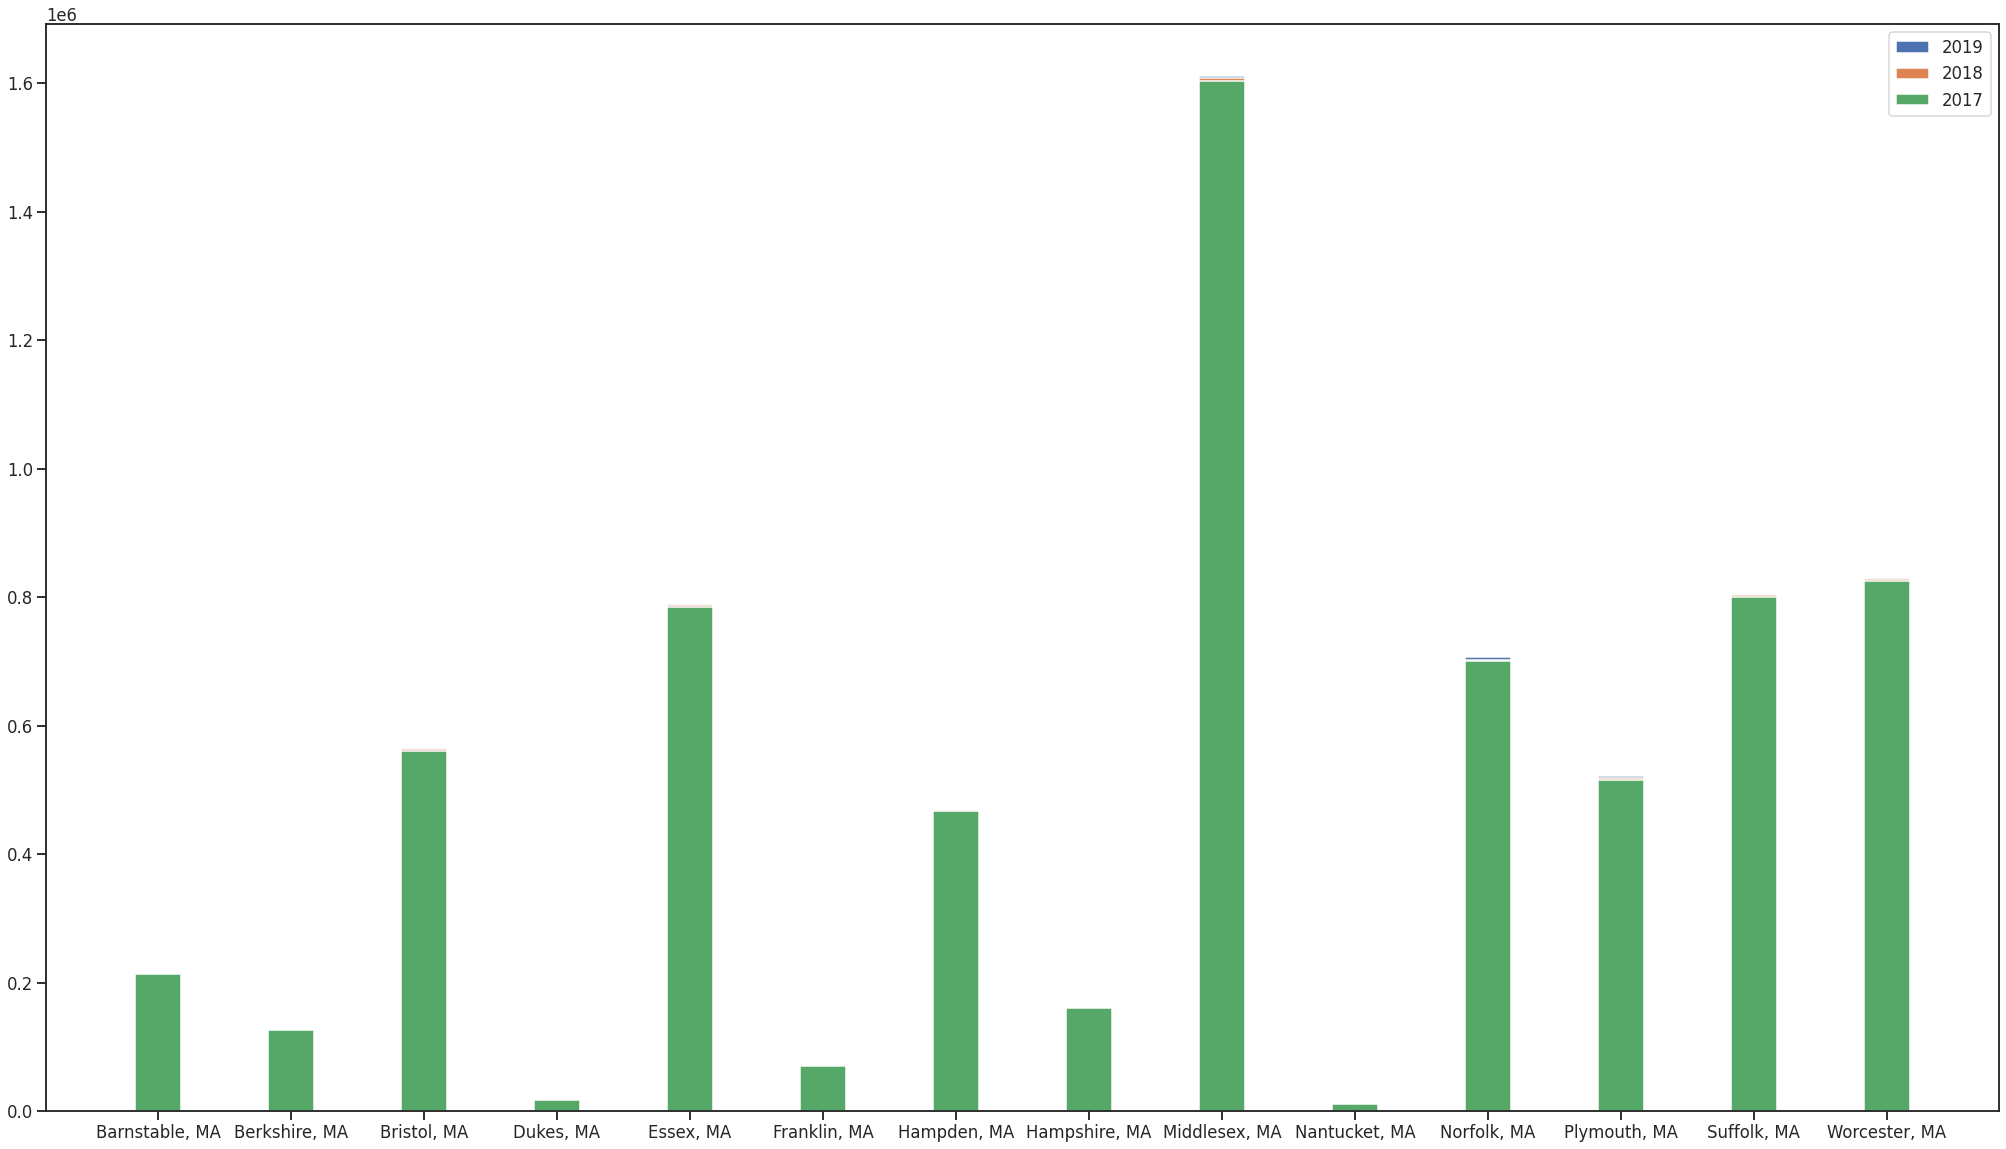

In [223]:
width = 0.35 # the width of the bars
fig, ax = plt.subplots(figsize=(35,20))

recs1 = ax.bar(mass_pop.GeoName, mass_pop['2019_pop'], width, label='2019')
recs2 = ax.bar(mass_pop.GeoName, mass_pop['2018_pop'], width, label='2018')
recs3 = ax.bar(mass_pop.GeoName, mass_pop['2017_pop'], width, label='2017')

ax.legend()
plt.show()

# middlesex has highest personal income since it has largest pop over other counties
# populaitons seem to not very much in past 3 years; makes sense

# Explore and clean demographic data set 2019

In [224]:
print(county_demographic.columns)
print(county_demographic.dtypes)
# seems demographic is all numeric type which is good

print(county_demographic.shape)
# we have 80 columns

county_demographic.head()
print(county_demographic.SUMLEV.unique())

mass_dem = county_demographic.loc[county_demographic.STATE == 25]
mass_dem

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE',
       'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE',
       'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE',
       'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE',
       'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE',
       'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE',
       'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE',
       'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE',
       'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE',
       'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE',
       'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
277476,50,25,1,Massachusetts,Barnstable County,1,0,215888,102854,113034,...,2105,1974,240,216,153,137,42,37,31,24
277477,50,25,1,Massachusetts,Barnstable County,1,1,8854,4465,4389,...,203,207,35,27,27,22,9,2,3,3
277478,50,25,1,Massachusetts,Barnstable County,1,2,9874,4958,4916,...,205,175,31,29,18,12,6,2,9,6
277479,50,25,1,Massachusetts,Barnstable County,1,3,11031,5696,5335,...,166,164,34,26,15,13,4,2,3,2
277480,50,25,1,Massachusetts,Barnstable County,1,4,12008,6417,5591,...,201,178,16,16,16,11,4,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280663,50,25,27,Massachusetts,Worcester County,12,14,44274,21387,22887,...,861,1083,118,153,43,24,7,13,2,11
280664,50,25,27,Massachusetts,Worcester County,12,15,34131,16141,17990,...,560,858,88,90,22,21,2,8,1,2
280665,50,25,27,Massachusetts,Worcester County,12,16,22869,10108,12761,...,374,533,48,70,8,18,2,6,3,2
280666,50,25,27,Massachusetts,Worcester County,12,17,14996,6133,8863,...,162,368,19,47,6,9,0,3,2,2


In [225]:
# keep only years 17-19

mass_dem = mass_dem.loc[mass_dem.YEAR > 9]
# keep only totals of dem; disregard ages
mass_dem = mass_dem.loc[mass_dem.AGEGRP == 0]
mass_dem

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
277647,50,25,1,Massachusetts,Barnstable County,10,0,213581,102148,111433,...,2876,2716,427,359,200,182,170,42,39,25
277666,50,25,1,Massachusetts,Barnstable County,11,0,213471,102032,111439,...,2987,2866,439,372,200,189,216,46,39,26
277685,50,25,1,Massachusetts,Barnstable County,12,0,212990,101791,111199,...,3089,2967,462,394,191,187,246,51,40,30
277875,50,25,3,Massachusetts,Berkshire County,10,0,126353,61023,65330,...,2632,2550,391,383,153,117,32,46,23,23
277894,50,25,3,Massachusetts,Berkshire County,11,0,125901,60824,65077,...,2787,2671,407,388,151,131,34,45,26,27
277913,50,25,3,Massachusetts,Berkshire County,12,0,124944,60406,64538,...,2905,2715,419,401,150,133,40,50,27,24
278103,50,25,5,Massachusetts,Bristol County,10,0,560941,271702,289239,...,18068,18075,3726,3768,1603,1242,304,288,273,245
278122,50,25,5,Massachusetts,Bristol County,11,0,564092,272979,291113,...,19046,19095,3961,3970,1616,1284,317,305,274,271
278141,50,25,5,Massachusetts,Bristol County,12,0,565217,273426,291791,...,19531,19629,4057,4071,1636,1326,342,311,291,284
278331,50,25,7,Massachusetts,Dukes County,10,0,17311,8487,8824,...,266,255,48,49,13,23,6,7,3,5


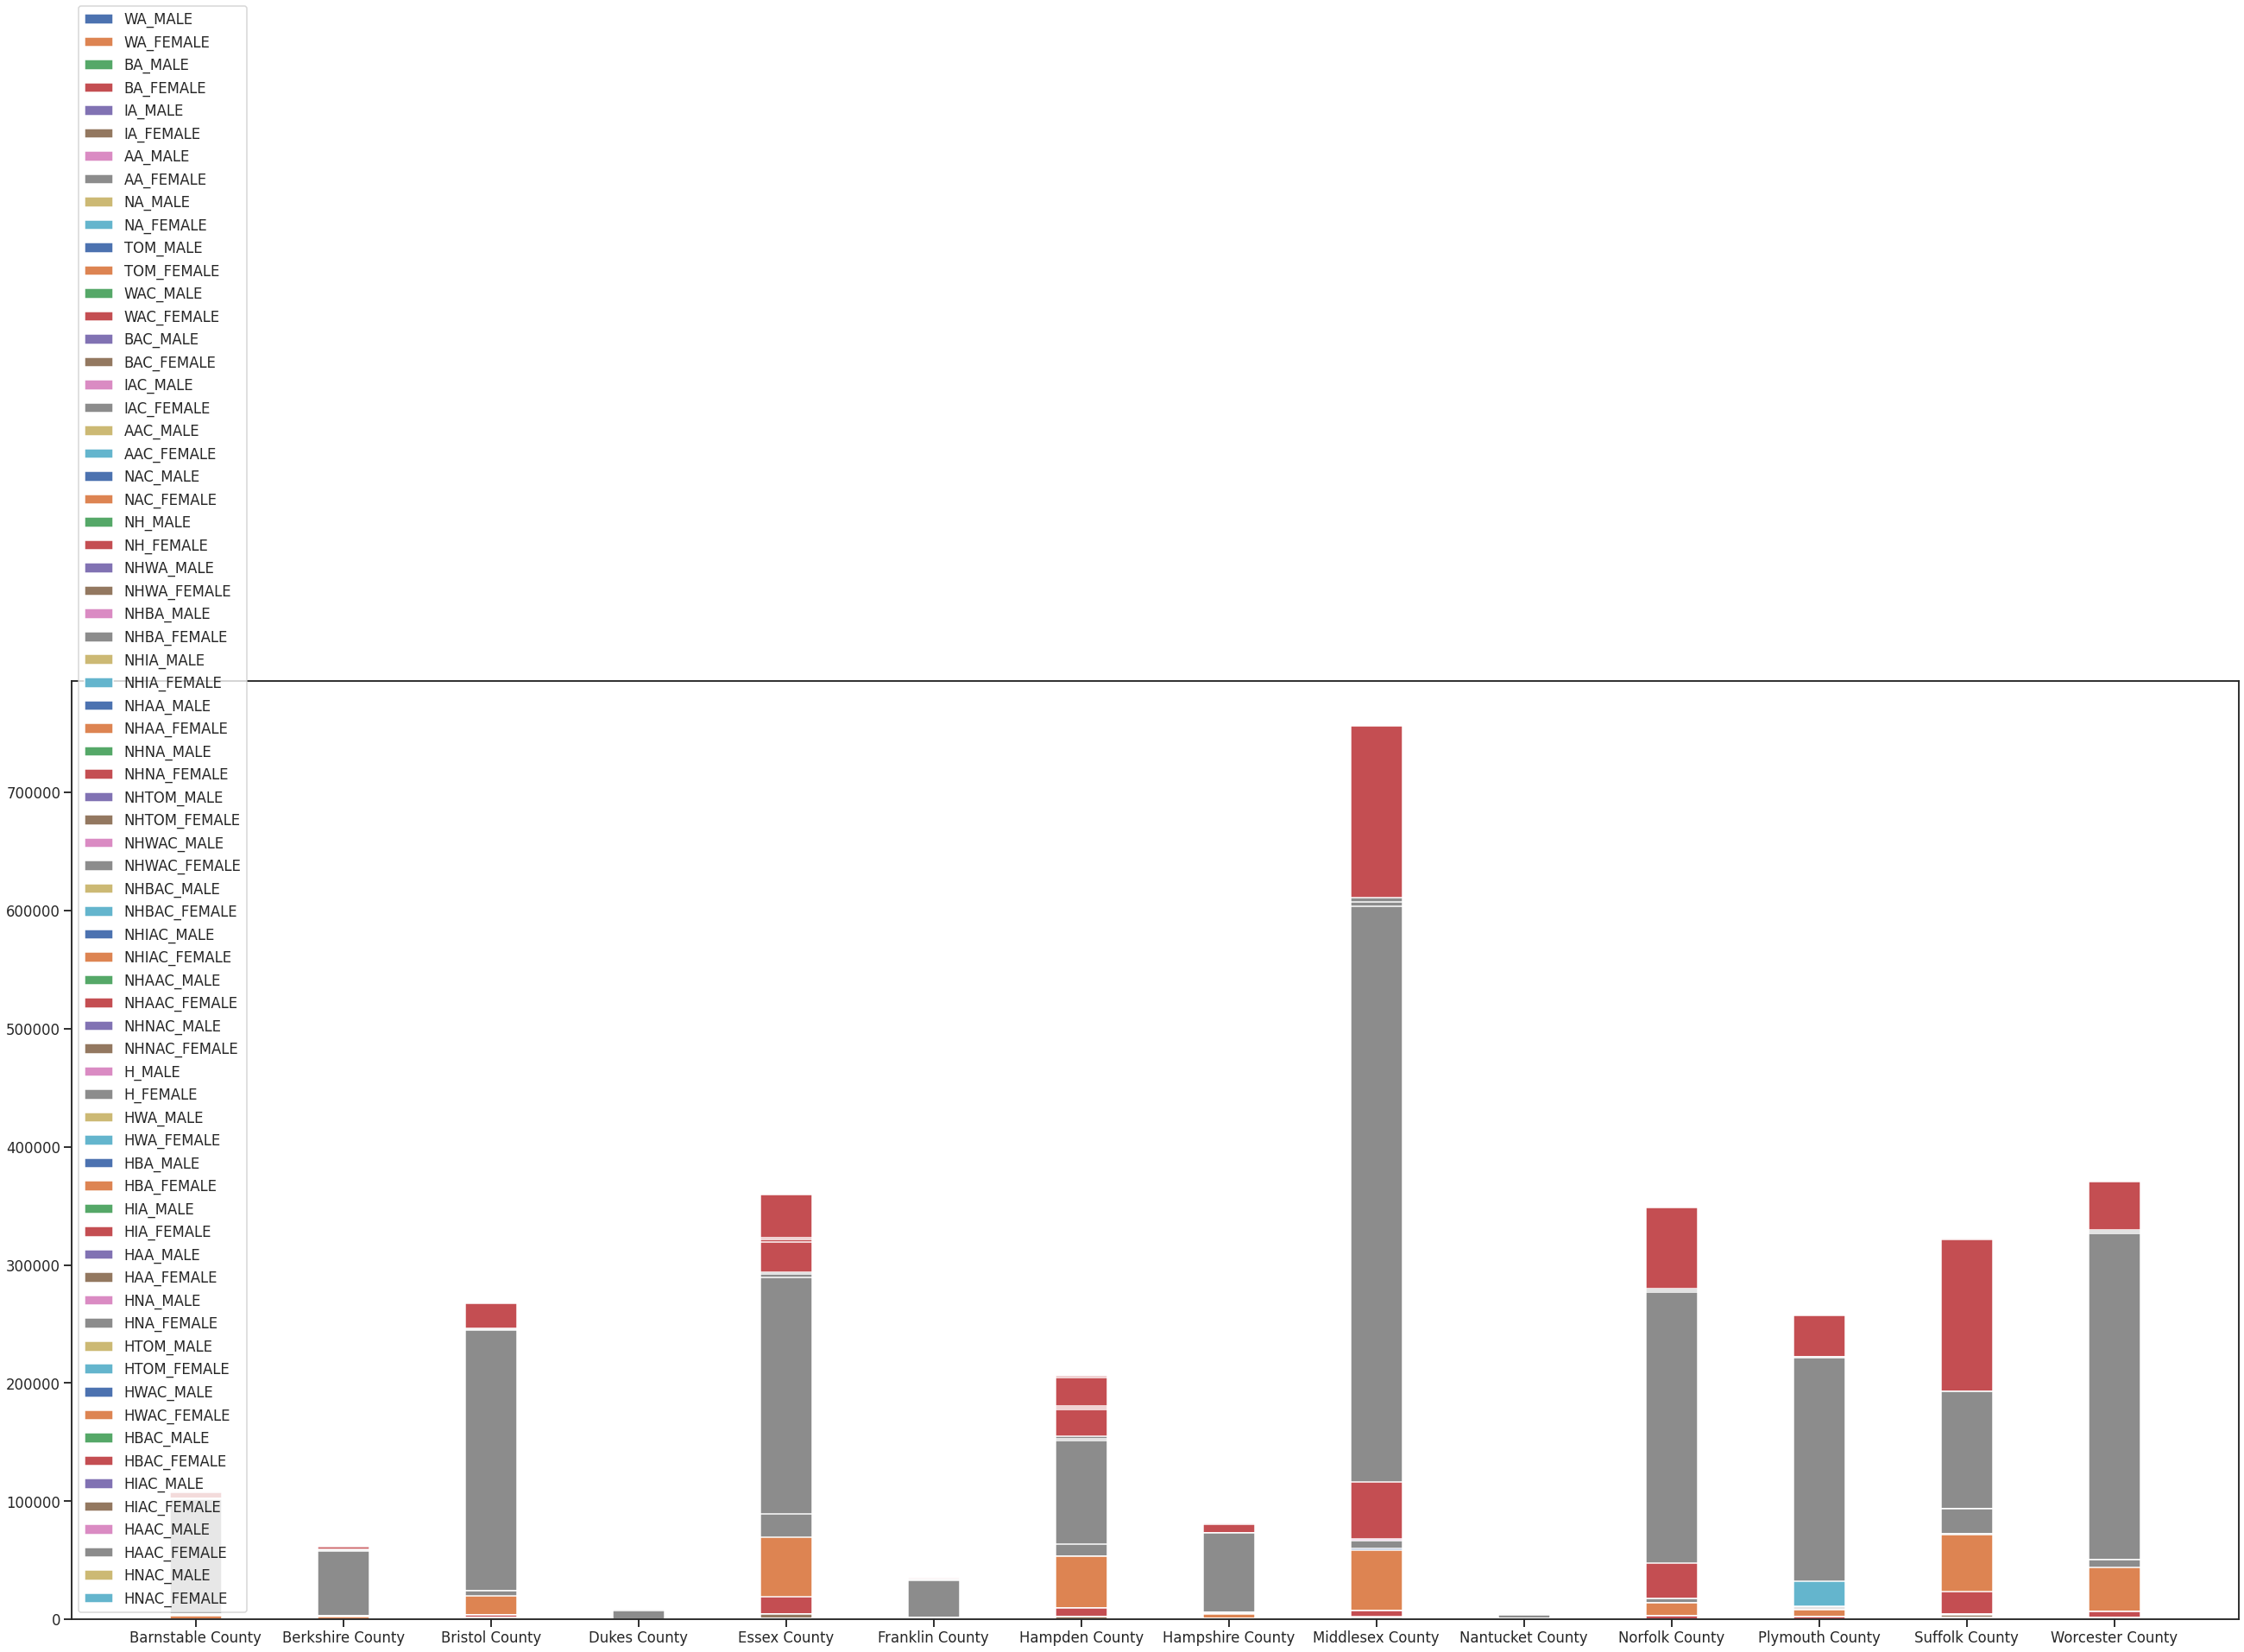

In [226]:
mass_dem.shape
ethn = mass_dem.columns.values[10:]

width = 0.35
fig, ax = plt.subplots(figsize=(45,20))

# rec1 = ax.bar(mass_dem.CTYNAME, mass_dem.loc[:,'TOT_POP'], width, label='tot pop')
for eth in ethn:
    ax.bar(mass_dem.CTYNAME, mass_dem[eth], width, label=eth)

ax.legend()
plt.show()

In [227]:
# make a pie chart of a county middlesex
# midsex19 = mass_dem.loc[mass_dem.CTYNAME == 'Middlesex County'].iloc[2:, 10:]
# data = midsex19.iloc[0, :]
# pie, ax = plt.subplots(figsize=[45,45])
# labels = data.keys()
# plt.pie(x=data, autopct="%.1f%%", labels=data.index, pctdistance=0.5)
# plt.title("Demogaphic of Middlesex County 19", fontsize=10);

array([<AxesSubplot:ylabel='279509'>], dtype=object)

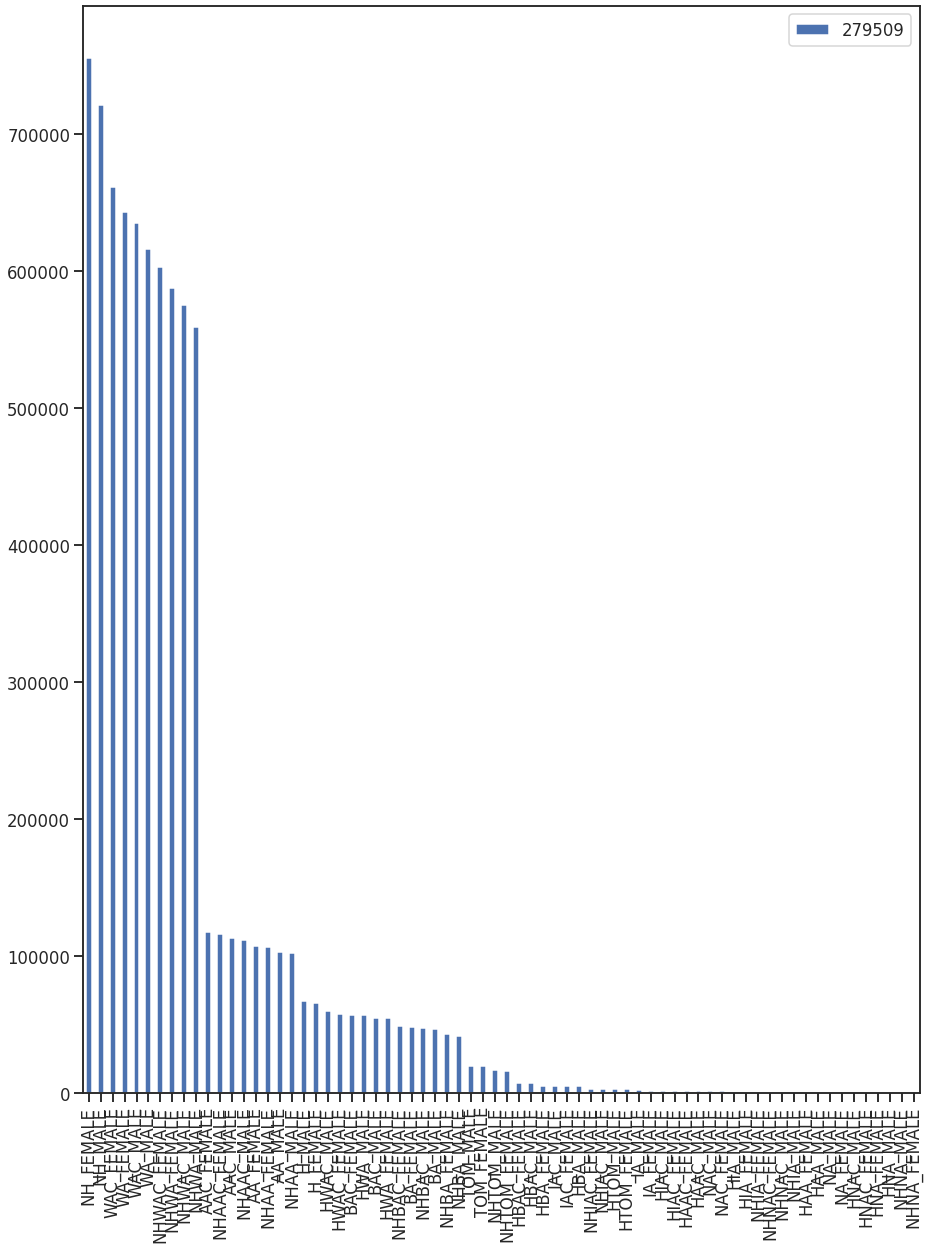

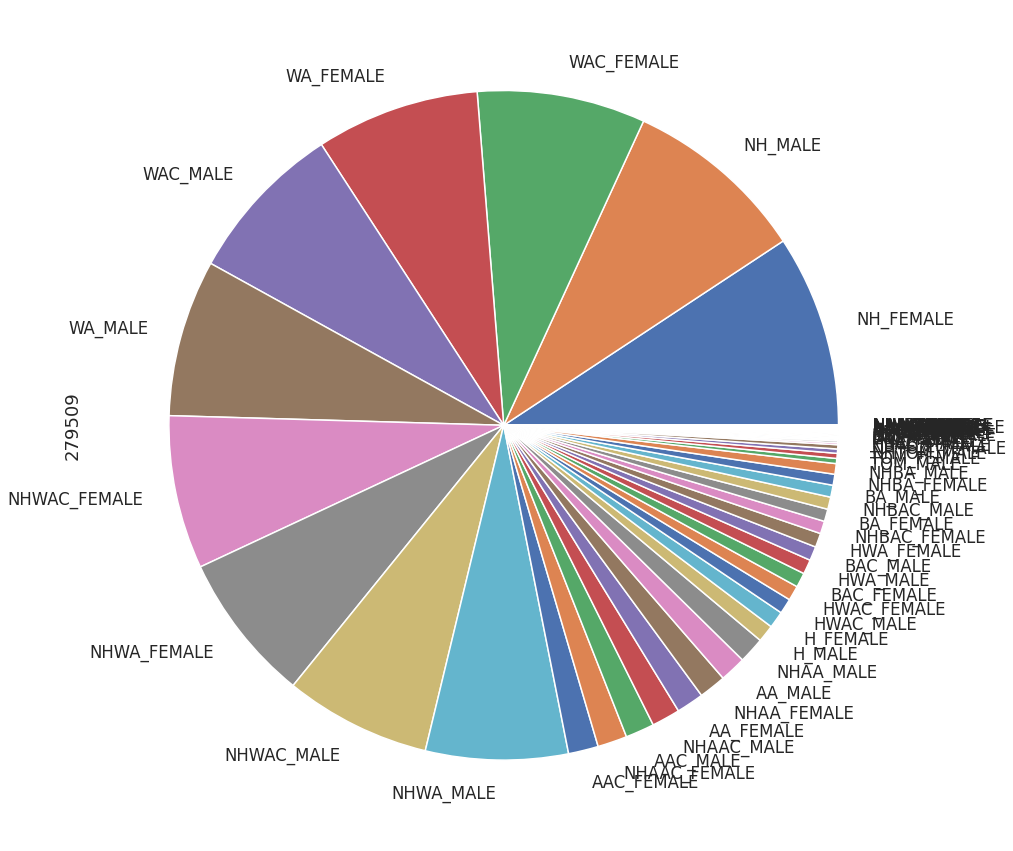

In [228]:
# make a foreign key and combine the data
# think of doing percentage/ratio by a county rather than a number

midsex19 = mass_dem.loc[mass_dem.CTYNAME == 'Middlesex County'].iloc[2:, 10:]

midsex19_t = midsex19.T
# midsex19_t['midsex19 col'] = midsex19_t[279509]
midsex19_t.sort_values(279509, ascending=False, inplace=True)
midsex19_t.plot(kind='bar', figsize=(15,20))
midsex19_t.plot(kind='pie', figsize=(15,20), subplots=True, legend=False)

In [229]:
# make one of BA BAC only

afro = mass_dem.columns.str.contains('B')
mass_afro = mass_dem.loc[:, afro]
mass_afro['CTYNAME'] = mass_dem.CTYNAME
mass_afro = remove_col(mass_afro, ['NHBA_MALE', 'NHBA_FEMALE', 'NHBAC_FEMALE', 'NHBAC_MALE'])
mass_afro.columns

<ipython-input-229-e157ddbf7bb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_afro['CTYNAME'] = mass_dem.CTYNAME


Index(['BA_MALE', 'BA_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'HBA_MALE',
       'HBA_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'CTYNAME'],
      dtype='object')

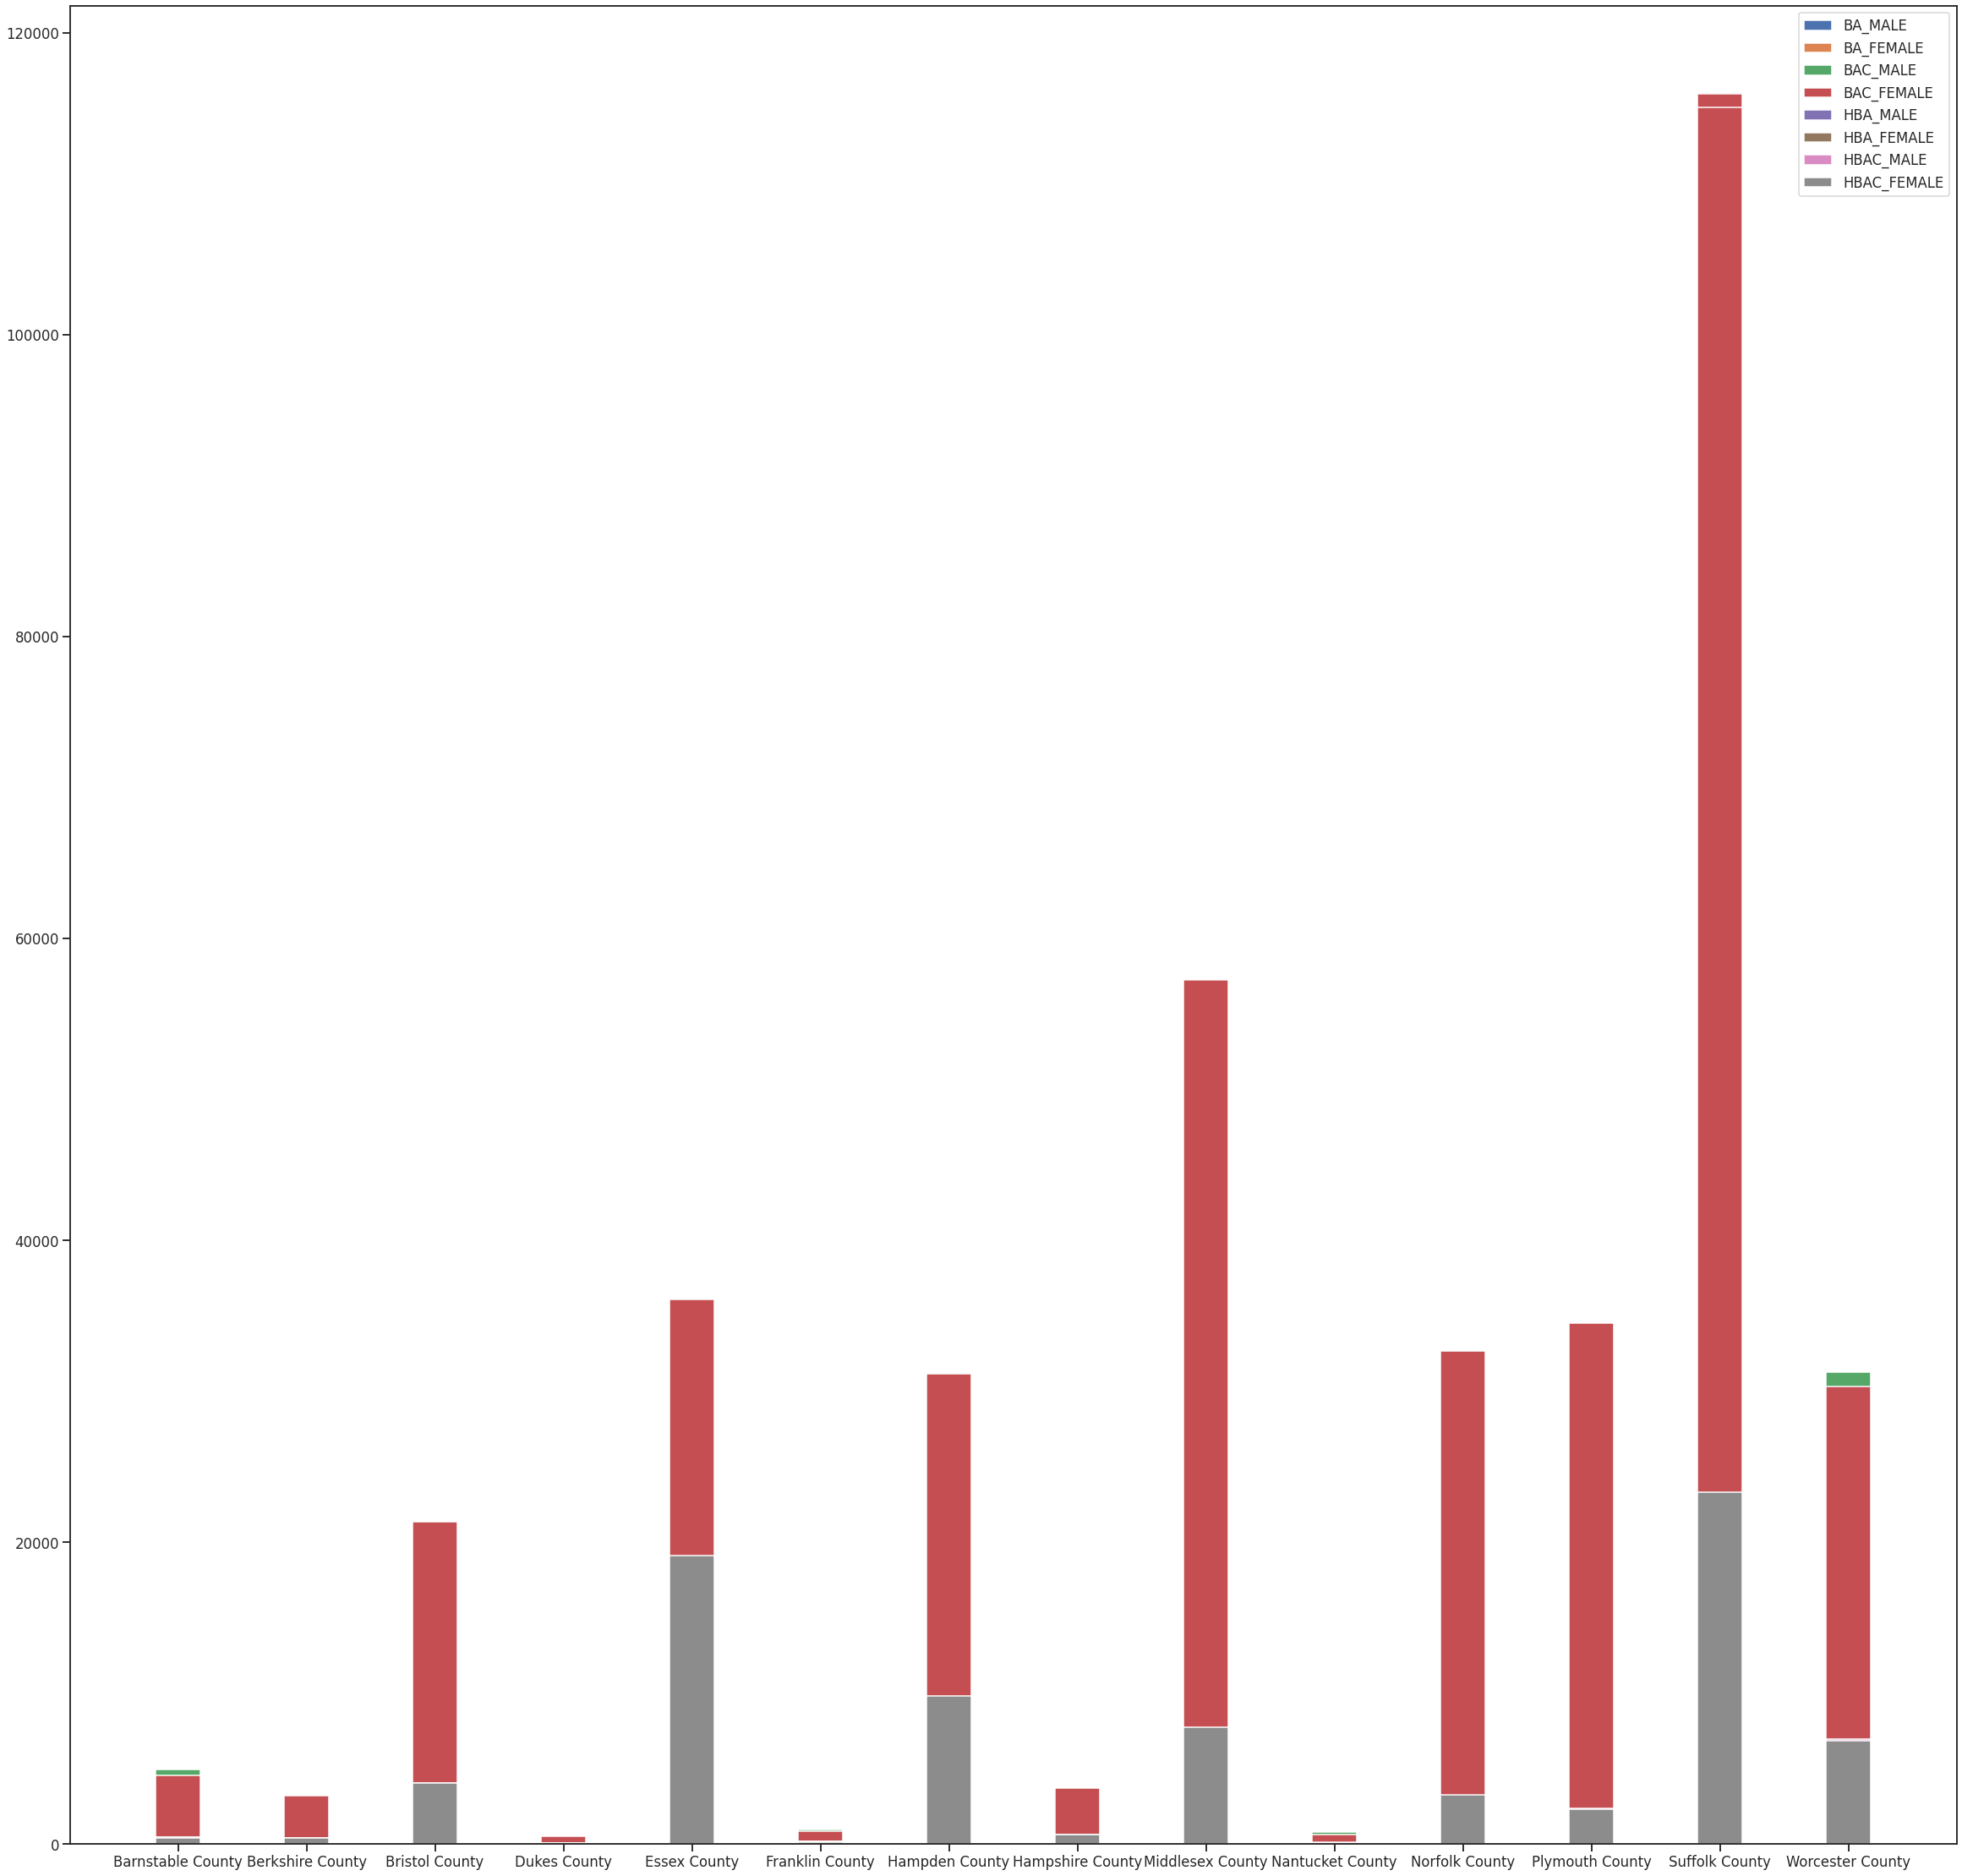

In [230]:
afro_ethn = mass_afro.columns.values[:-1]
fig, ax = plt.subplots(figsize=(40,40))
for eth in afro_ethn:
    ax.bar(mass_afro.CTYNAME, mass_afro[eth], width, label=eth)

ax.legend()
plt.show()
# appears that counties with more famale Black or combin ethnicities have higher AQI on average
# this makes sense as black females have least power when looking at social classes

 Change demographic column into ratio per the county

In [231]:
# need to build ratios and filter out duplicate ethnicities; such as the nots and in combinations or alones
mass_dem
# make 3 df yr2017, yr2018, yr2019


# mass_dem
# mass_dem['test'] = mass_dem.TOT_MALE / mass_dem.TOT_POP * 100
# print(mass_dem.TOT_MALE)
# print(mass_dem.test)

demographic = mass_dem.columns.values[8:]
mass_dem_ratio = mass_dem
# make ratios
for dem in demographic:
    mass_dem_ratio[dem + '_ratio'] = mass_dem[dem] / mass_dem['TOT_POP'] * 100
    # print(dem + ' ratio')

In [232]:
mass_dem_ratio = remove_col(mass_dem_ratio, demographic)
mass_dem_ratio

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
277647,50,25,1,Massachusetts,Barnstable County,10,0,213581,47.826352,52.173648,...,1.346562,1.271649,0.199924,0.168086,0.093641,0.085214,0.079595,0.019665,0.018260,0.011705
277666,50,25,1,Massachusetts,Barnstable County,11,0,213471,47.796656,52.203344,...,1.399253,1.342571,0.205649,0.174263,0.093690,0.088537,0.101185,0.021549,0.018269,0.012180
277685,50,25,1,Massachusetts,Barnstable County,12,0,212990,47.791446,52.208554,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
277875,50,25,3,Massachusetts,Berkshire County,10,0,126353,48.295648,51.704352,...,2.083053,2.018155,0.309451,0.303119,0.121089,0.092598,0.025326,0.036406,0.018203,0.018203
277894,50,25,3,Massachusetts,Berkshire County,11,0,125901,48.310974,51.689026,...,2.213644,2.121508,0.323270,0.308179,0.119936,0.104050,0.027005,0.035742,0.020651,0.021445
277913,50,25,3,Massachusetts,Berkshire County,12,0,124944,48.346459,51.653541,...,2.325042,2.172973,0.335350,0.320944,0.120054,0.106448,0.032014,0.040018,0.021610,0.019209
278103,50,25,5,Massachusetts,Bristol County,10,0,560941,48.436823,51.563177,...,3.221016,3.222264,0.664241,0.671728,0.285770,0.221414,0.054195,0.051342,0.048668,0.043677
278122,50,25,5,Massachusetts,Bristol County,11,0,564092,48.392638,51.607362,...,3.376400,3.385086,0.702190,0.703786,0.286478,0.227622,0.056197,0.054069,0.048574,0.048042
278141,50,25,5,Massachusetts,Bristol County,12,0,565217,48.375403,51.624597,...,3.455487,3.472825,0.717777,0.720254,0.289446,0.234600,0.060508,0.055023,0.051485,0.050246
278331,50,25,7,Massachusetts,Dukes County,10,0,17311,49.026630,50.973370,...,1.536595,1.473052,0.277280,0.283057,0.075097,0.132863,0.034660,0.040437,0.017330,0.028883


In [233]:
mass_dem_ratio_17 = mass_dem_ratio.loc[mass_dem.YEAR == 10]
mass_dem_ratio_18 = mass_dem_ratio.loc[mass_dem.YEAR == 11]
mass_dem_ratio_19 = mass_dem_ratio.loc[mass_dem.YEAR == 12]

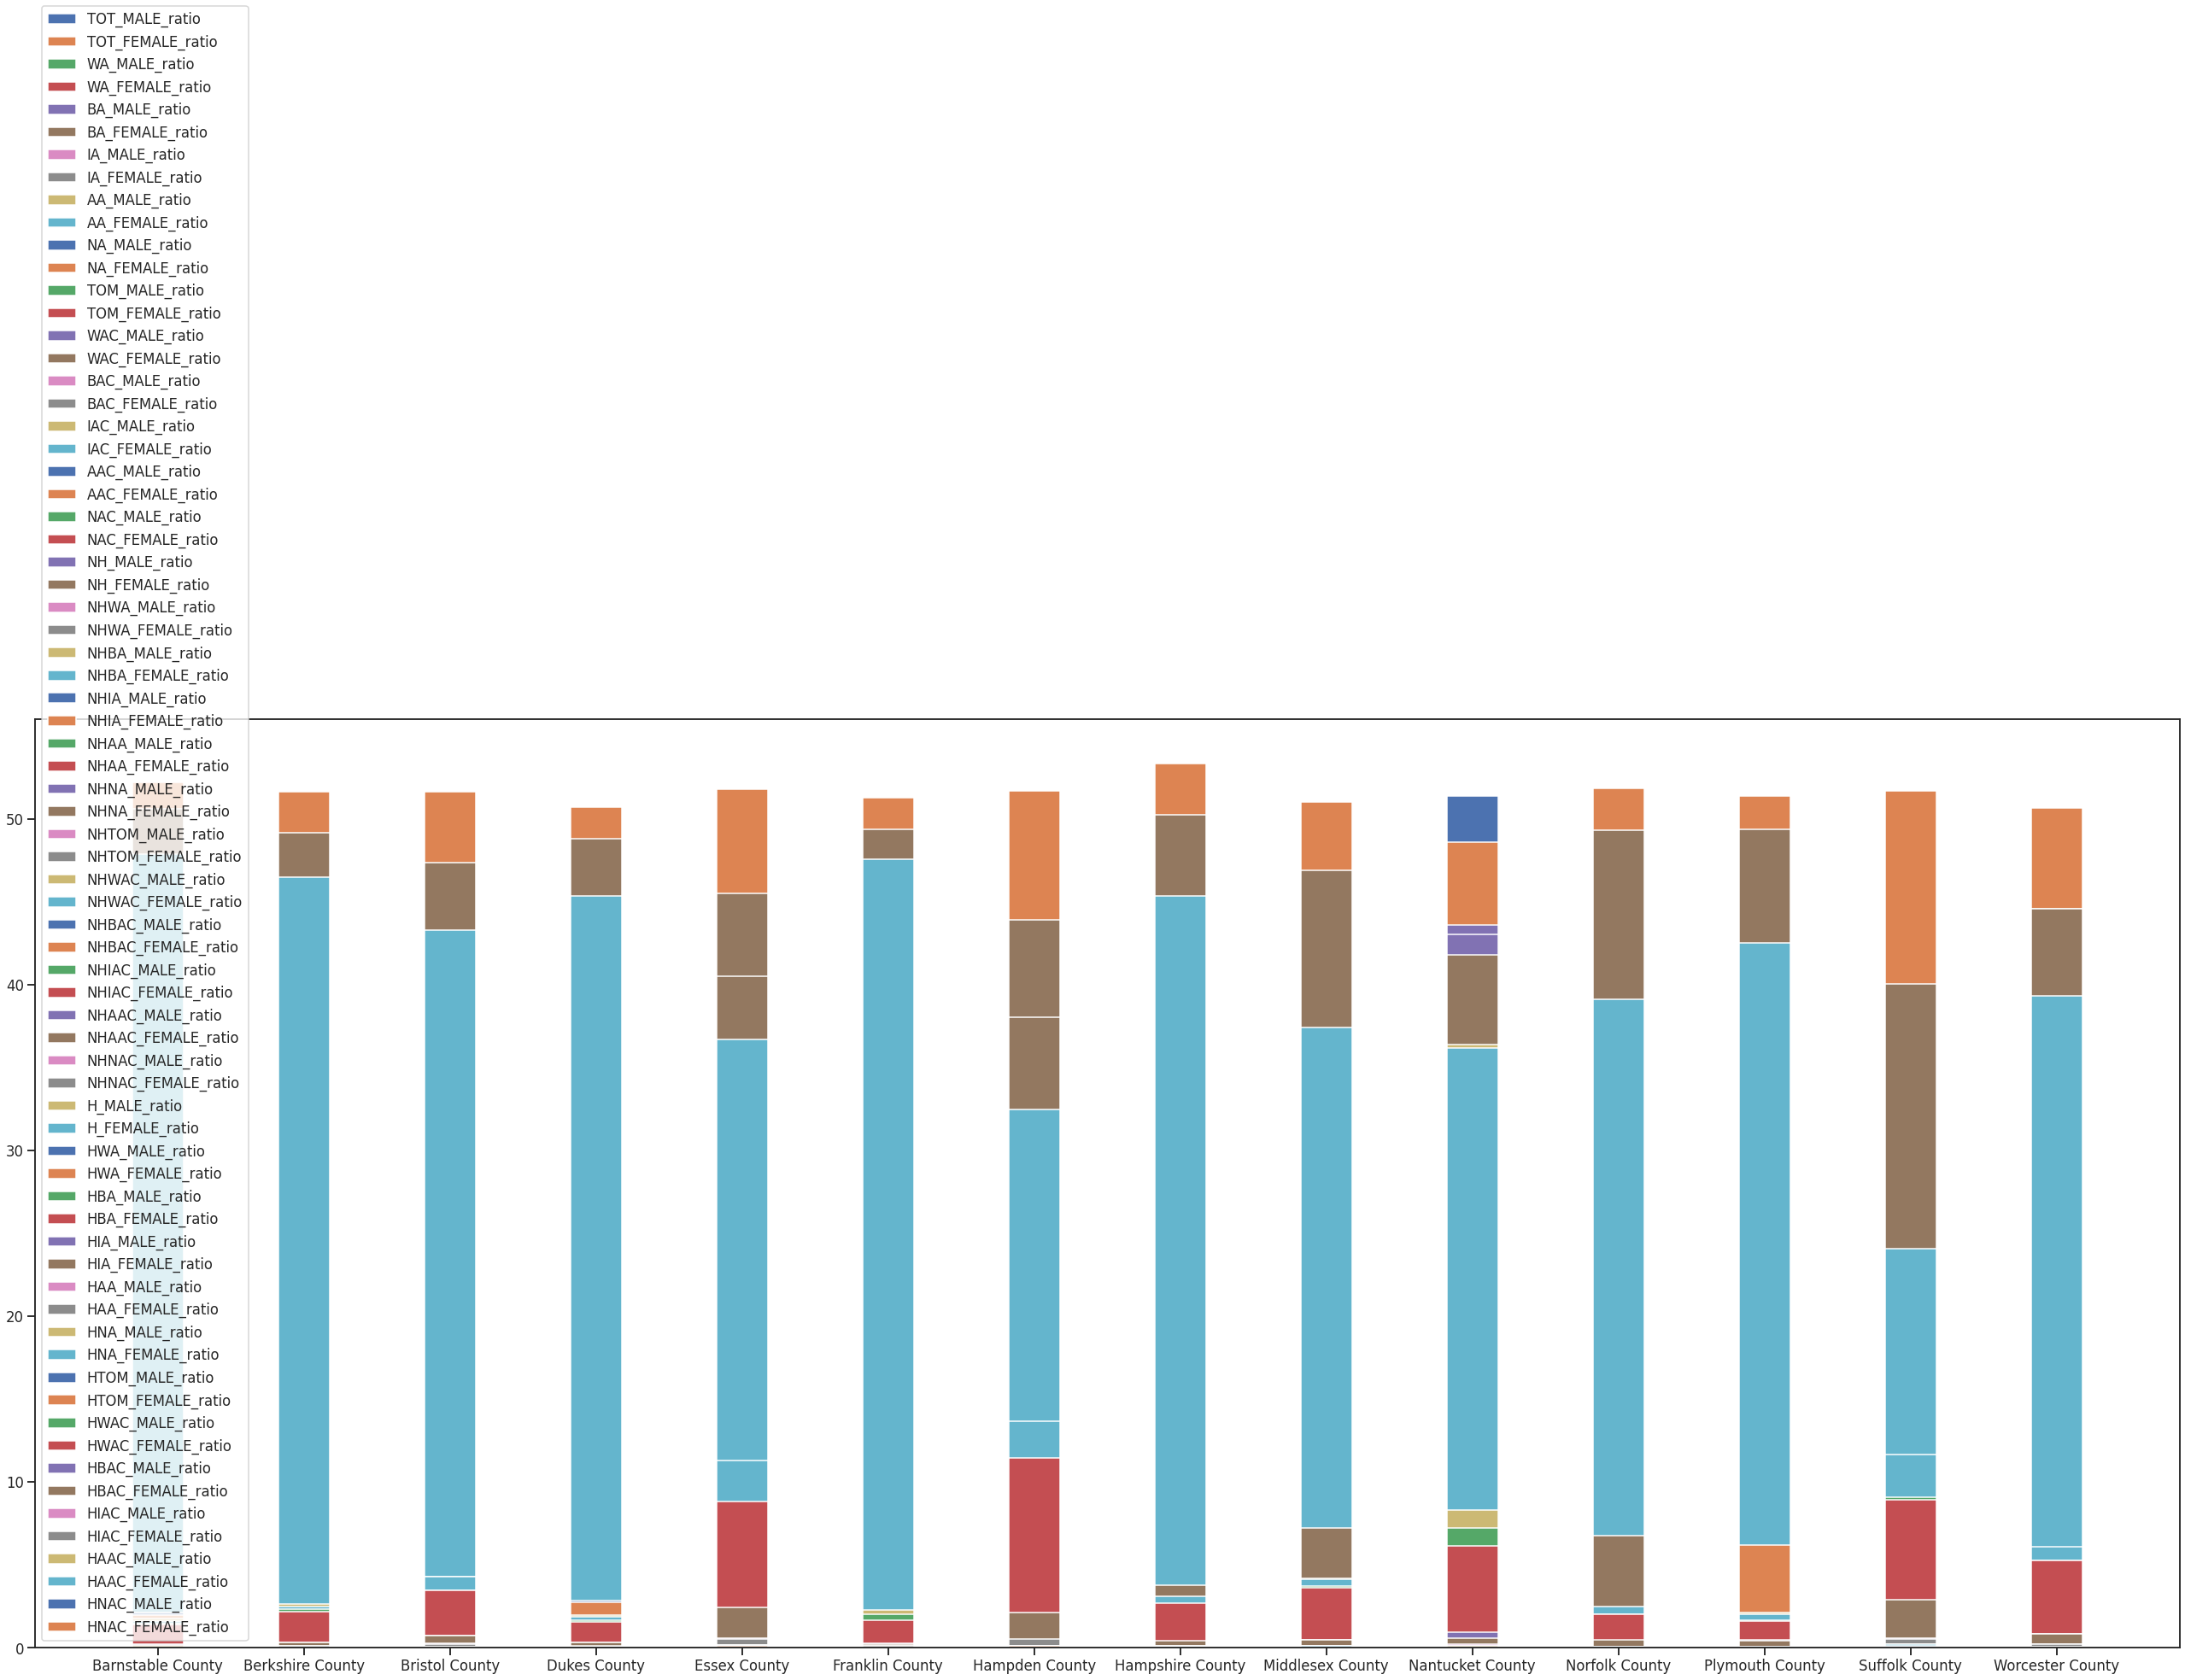

In [234]:
# make a bar chart of all demographs in county 19
demographic_ratios = mass_dem_ratio.columns.values[8:]

fig, ax = plt.subplots(figsize=(45,20))

# rec1 = ax.bar(mass_dem.CTYNAME, mass_dem.loc[:,'TOT_POP'], width, label='tot pop')
for dem in demographic_ratios:
    ax.bar(mass_dem_ratio_19.CTYNAME, mass_dem_ratio_19[dem], width, label=dem)

ax.legend()
plt.show()
# why are the bar charts not all equal
# maybe do them for every year

In [235]:
mass_dem_ratio_19
barnstable = mass_dem_ratio_19.loc[mass_dem_ratio_19['CTYNAME'] == 'Barnstable County']
display(barnstable.iloc[:, 10:])
res = barnstable['WA_MALE_ratio'] + barnstable['WA_FEMALE_ratio']
res = 0
for i in barnstable.columns.values[10:]:
    res += barnstable[i]
    print(res, i)
res
# to get the 100% distro of a county we want form WA_MALE to TOM_FEMALE afterwards the percentages get mixed

,WA_MALE_ratio,WA_FEMALE_ratio,BA_MALE_ratio,BA_FEMALE_ratio,IA_MALE_ratio,IA_FEMALE_ratio,AA_MALE_ratio,AA_FEMALE_ratio,NA_MALE_ratio,NA_FEMALE_ratio,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
277685,43.807691,48.374572,1.824968,1.632941,0.393446,0.354946,0.754965,0.83572,0.035682,0.027231,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.01878,0.014085


277685    43.807691
Name: WA_MALE_ratio, dtype: float64 WA_MALE_ratio
277685    92.182262
Name: WA_MALE_ratio, dtype: float64 WA_FEMALE_ratio
277685    94.00723
Name: WA_MALE_ratio, dtype: float64 BA_MALE_ratio
277685    95.640171
Name: WA_MALE_ratio, dtype: float64 BA_FEMALE_ratio
277685    96.033617
Name: WA_MALE_ratio, dtype: float64 IA_MALE_ratio
277685    96.388563
Name: WA_MALE_ratio, dtype: float64 IA_FEMALE_ratio
277685    97.143528
Name: WA_MALE_ratio, dtype: float64 AA_MALE_ratio
277685    97.979248
Name: WA_MALE_ratio, dtype: float64 AA_FEMALE_ratio
277685    98.01493
Name: WA_MALE_ratio, dtype: float64 NA_MALE_ratio
277685    98.042162
Name: WA_MALE_ratio, dtype: float64 NA_FEMALE_ratio
277685    99.016855
Name: WA_MALE_ratio, dtype: float64 TOM_MALE_ratio
277685    100.0
Name: WA_MALE_ratio, dtype: float64 TOM_FEMALE_ratio
277685    144.694117
Name: WA_MALE_ratio, dtype: float64 WAC_MALE_ratio
277685    193.953707
Name: WA_MALE_ratio, dtype: float64 WAC_FEMALE_ratio
277685

277685    504.173905
Name: WA_MALE_ratio, dtype: float64

In [236]:
# do all counties have at least 40% for wac

mass_dem_ratio_19.columns.values[10:12]
mass_counties = mass_dem_ratio_19.CTYNAME.values
# test = mass_dem_ratio_19.CTYNAME == 'Barnstable County'
# test2 = mass_dem_ratio_19.loc[test]['WA_MALE_ratio']
# test3 = test2 > 40
# if(test3.values):
#     print('True')
for county in mass_counties:
   m_ratio = (mass_dem_ratio_19.loc[mass_dem_ratio_19.CTYNAME == county]['WA_MALE_ratio'])
   f_ratio = (mass_dem_ratio_19.loc[mass_dem_ratio_19.CTYNAME == county]['WA_FEMALE_ratio'])
   if((m_ratio < 40).values | (f_ratio < 40).values):
       print(county, m_ratio.values, f_ratio.values)

# only 4 counties have less than 40% of white demographic
# those are suffolk and norfolk, middlesex
# bristol, hampshire, worcester, suffolk have highest average aqi 2019

Hampden County [39.98846414] [42.65007333]
Middlesex County [38.26533366] [39.91545568]
Norfolk County [37.37115772] [40.1904425]
Suffolk County [30.31818357] [31.40748868]


# combine the data sets
make the foreign key
combine assets last as that takes longest to combine

In [237]:
print(mass_aqi_19.columns)
print(mass_dem_ratio_19)
print(mass_personal_inc)

Index(['county Name', 'State Code', 'County Code', 'Date', 'AQI', 'Category',
       'Defining Parameter', 'Defining Site', 'Number of Sites Reporting'],
      dtype='object')
        SUMLEV  STATE  COUNTY         STNAME            CTYNAME  YEAR  AGEGRP  \
277685      50     25       1  Massachusetts  Barnstable County    12       0   
277913      50     25       3  Massachusetts   Berkshire County    12       0   
278141      50     25       5  Massachusetts     Bristol County    12       0   
278369      50     25       7  Massachusetts       Dukes County    12       0   
278597      50     25       9  Massachusetts       Essex County    12       0   
278825      50     25      11  Massachusetts    Franklin County    12       0   
279053      50     25      13  Massachusetts     Hampden County    12       0   
279281      50     25      15  Massachusetts   Hampshire County    12       0   
279509      50     25      17  Massachusetts   Middlesex County    12       0   
279737      50

In [238]:
# add GeoFIPS for mass-dem_ratio_19

state_dem = mass_dem_ratio_19.STATE.astype(str).values
county_dem = mass_dem_ratio_19.COUNTY.astype(str).values
geofips_dem = []
for stateID, countyID in zip(state_dem, county_dem):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_dem.append(id)

mass_dem_ratio_19['GeoFIPS'] = geofips_dem
display(mass_dem_ratio_19)

<ipython-input-238-c4fb88ffa4c5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mass_dem_ratio_19['GeoFIPS'] = geofips_dem


,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,...,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio,GeoFIPS
277685,50,25,1,Massachusetts,Barnstable County,12,0,212990,47.791446,52.208554,...,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085,25001
277913,50,25,3,Massachusetts,Berkshire County,12,0,124944,48.346459,51.653541,...,2.172973,0.335350,0.320944,0.120054,0.106448,0.032014,0.040018,0.021610,0.019209,25003
278141,50,25,5,Massachusetts,Bristol County,12,0,565217,48.375403,51.624597,...,3.472825,0.717777,0.720254,0.289446,0.234600,0.060508,0.055023,0.051485,0.050246,25005
278369,50,25,7,Massachusetts,Dukes County,12,0,17332,49.301869,50.698131,...,1.575121,0.311562,0.305793,0.086545,0.121163,0.051927,0.075006,0.040388,0.051927,25007
278597,50,25,9,Massachusetts,Essex County,12,0,789034,48.201979,51.798021,...,8.842205,2.358960,2.422836,0.579569,0.545731,0.162477,0.163111,0.094039,0.104938,25009
278825,50,25,11,Massachusetts,Franklin County,12,0,70180,48.690510,51.309490,...,1.668567,0.262183,0.215161,0.133941,0.116842,0.031348,0.034198,0.028498,0.029923,25011
279053,50,25,13,Massachusetts,Hampden County,12,0,466372,48.298783,51.701217,...,11.464882,1.895268,2.103900,0.466151,0.510322,0.103137,0.120505,0.092201,0.094345,25013
279281,50,25,15,Massachusetts,Hampshire County,12,0,160830,46.646770,53.353230,...,2.696636,0.387987,0.404775,0.128707,0.126220,0.072126,0.087048,0.036685,0.027980,25015
279509,50,25,17,Massachusetts,Middlesex County,12,0,1611699,48.988366,51.011634,...,3.617239,0.458274,0.479680,0.129180,0.118757,0.091642,0.094931,0.028914,0.027487,25017
279737,50,25,19,Massachusetts,Nantucket County,12,0,11399,51.372927,48.627073,...,6.123344,0.938679,0.605316,0.219317,0.140363,0.114045,0.017545,0.008773,0.017545,25019


In [239]:
# add GeoFIPS for mass_aqi_2019
state_aqi = mass_aqi_19['State Code'].astype(str).values
county_aqi = mass_aqi_19['County Code'].astype(str).values

geofips_aqi = []
for stateID, countyID in zip(state_aqi, county_aqi):
    id = ''
    stateLen = len(stateID)
    countyLen = len(countyID)
    if(stateLen < 2):
        id += '0' + stateID
    else:
        id += stateID
    if(countyLen == 1):
        id += '00' + countyID
    elif(countyLen == 2):
        id += '0' + countyID
    else:
        id += countyID
    geofips_aqi.append(id)

mass_aqi_19['GeoFIPS'] = geofips_aqi
display(mass_aqi_19)

,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,GeoFIPS
133919,Barnstable,25,1,2019-01-01,33,Good,Ozone,25-001-0002,1,25001
133920,Barnstable,25,1,2019-01-02,35,Good,Ozone,25-001-0002,1,25001
133921,Barnstable,25,1,2019-01-03,36,Good,Ozone,25-001-0002,1,25001
133922,Barnstable,25,1,2019-01-04,26,Good,Ozone,25-001-0002,1,25001
133923,Barnstable,25,1,2019-01-05,37,Good,Ozone,25-001-0002,1,25001
...,...,...,...,...,...,...,...,...,...,...
138628,Worcester,25,27,2019-12-27,40,Good,PM2.5,25-027-0023,3,25027
138629,Worcester,25,27,2019-12-28,28,Good,Ozone,25-027-0024,3,25027
138630,Worcester,25,27,2019-12-29,38,Good,PM2.5,25-027-0023,3,25027
138631,Worcester,25,27,2019-12-30,34,Good,Ozone,25-027-0024,3,25027


In [240]:
# combine them

mass_inc_aqi_19 = pd.merge(mass_incomes, mass_aqi_19, on='GeoFIPS')
mass_inc_aqi_dem_19 = pd.merge(mass_inc_aqi_19, mass_dem_ratio_19, on='GeoFIPS')

display(mass_inc_aqi_dem_19)

,index,GeoFIPS,GeoName,Region,LineCode,2017_per_capita,2018_per_capita,2019_per_capita,2017_personal_income,2018_personal_income,...,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
0,3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
1,3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
2,3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
3,3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
4,3791,25001,"Barnstable, MA",1,3.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,...,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4709,3830,25027,"Worcester, MA",1,3.0,54599.0,56507.0,58563.0,45085472.0,46847604.0,...,5.248236,5.273999,0.839130,0.823961,0.199128,0.197804,0.070068,0.071633,0.032265,0.032024
4710,3830,25027,"Worcester, MA",1,3.0,54599.0,56507.0,58563.0,45085472.0,46847604.0,...,5.248236,5.273999,0.839130,0.823961,0.199128,0.197804,0.070068,0.071633,0.032265,0.032024
4711,3830,25027,"Worcester, MA",1,3.0,54599.0,56507.0,58563.0,45085472.0,46847604.0,...,5.248236,5.273999,0.839130,0.823961,0.199128,0.197804,0.070068,0.071633,0.032265,0.032024
4712,3830,25027,"Worcester, MA",1,3.0,54599.0,56507.0,58563.0,45085472.0,46847604.0,...,5.248236,5.273999,0.839130,0.823961,0.199128,0.197804,0.070068,0.071633,0.032265,0.032024


In [253]:
# drop redundant columns
# rename more descriptive names
print(mass_inc_aqi_dem_19.columns)
col_to_drop = ['SUMLEV', 'LineCode', 'GeoName', 'county Name', 'State Code', 'County Code', 'STATE', 'COUNTY', 'STNAME', 'YEAR', 'Region']
mass_19_df = remove_col(mass_inc_aqi_dem_19, col_to_drop)
display(mass_19_df)
print(mass_19_df.columns)

Index(['index', 'GeoFIPS', 'GeoName', 'Region', 'LineCode', '2017_per_capita',
       '2018_per_capita', '2019_per_capita', '2017_personal_income',
       '2018_personal_income',
       ...
       'HWAC_MALE_ratio', 'HWAC_FEMALE_ratio', 'HBAC_MALE_ratio',
       'HBAC_FEMALE_ratio', 'HIAC_MALE_ratio', 'HIAC_FEMALE_ratio',
       'HAAC_MALE_ratio', 'HAAC_FEMALE_ratio', 'HNAC_MALE_ratio',
       'HNAC_FEMALE_ratio'],
      dtype='object', length=103)
Index(['index', 'GeoFIPS', '2017_per_capita', '2018_per_capita',
       '2019_per_capita', '2017_personal_income', '2018_personal_income',
       '2019_personal_income', '2017_pop', '2018_pop', '2019_pop', 'Date',
       'AQI', 'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting', 'CTYNAME', 'AGEGRP', 'TOT_POP',
       'TOT_MALE_ratio', 'TOT_FEMALE_ratio', 'WA_MALE_ratio',
       'WA_FEMALE_ratio', 'BA_MALE_ratio', 'BA_FEMALE_ratio', 'IA_MALE_ratio',
       'IA_FEMALE_ratio', 'AA_MALE_ratio', 'AA_FEMALE_ratio

,index,GeoFIPS,2017_per_capita,2018_per_capita,2019_per_capita,2017_personal_income,2018_personal_income,2019_personal_income,2017_pop,2018_pop,2019_pop,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,CTYNAME,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,WA_MALE_ratio,WA_FEMALE_ratio,BA_MALE_ratio,BA_FEMALE_ratio,IA_MALE_ratio,IA_FEMALE_ratio,AA_MALE_ratio,AA_FEMALE_ratio,NA_MALE_ratio,NA_FEMALE_ratio,TOM_MALE_ratio,TOM_FEMALE_ratio,WAC_MALE_ratio,WAC_FEMALE_ratio,BAC_MALE_ratio,BAC_FEMALE_ratio,IAC_MALE_ratio,IAC_FEMALE_ratio,AAC_MALE_ratio,AAC_FEMALE_ratio,NAC_MALE_ratio,NAC_FEMALE_ratio,NH_MALE_ratio,NH_FEMALE_ratio,NHWA_MALE_ratio,NHWA_FEMALE_ratio,NHBA_MALE_ratio,NHBA_FEMALE_ratio,NHIA_MALE_ratio,NHIA_FEMALE_ratio,NHAA_MALE_ratio,NHAA_FEMALE_ratio,NHNA_MALE_ratio,NHNA_FEMALE_ratio,NHTOM_MALE_ratio,NHTOM_FEMALE_ratio,NHWAC_MALE_ratio,NHWAC_FEMALE_ratio,NHBAC_MALE_ratio,NHBAC_FEMALE_ratio,NHIAC_MALE_ratio,NHIAC_FEMALE_ratio,NHAAC_MALE_ratio,NHAAC_FEMALE_ratio,NHNAC_MALE_ratio,NHNAC_FEMALE_ratio,H_MALE_ratio,H_FEMALE_ratio,HWA_MALE_ratio,HWA_FEMALE_ratio,HBA_MALE_ratio,HBA_FEMALE_ratio,HIA_MALE_ratio,HIA_FEMALE_ratio,HAA_MALE_ratio,HAA_FEMALE_ratio,HNA_MALE_ratio,HNA_FEMALE_ratio,HTOM_MALE_ratio,HTOM_FEMALE_ratio,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
0,3791,25001,71080.0,74714.0,77435.0,15181333.0,15949290.0,16492955.0,213581.0,213471.0,212990.0,2019-01-01,33,Good,Ozone,25-001-0002,1,Barnstable County,0,212990,47.791446,52.208554,43.807691,48.374572,1.824968,1.632941,0.393446,0.354946,0.754965,0.835720,0.035682,0.027231,0.974694,0.983145,44.694117,49.259590,2.331095,2.147049,0.680314,0.658247,1.036668,1.109911,0.091084,0.078877,46.006385,50.596742,42.448002,47.062303,1.678483,1.508052,0.330062,0.290154,0.652613,0.822104,0.023475,0.018780,0.873750,0.895347,43.243814,47.866567,2.114184,1.962064,0.590638,0.570449,0.921170,1.085966,0.072304,0.064792,1.785060,1.611813,1.359688,1.312268,0.146486,0.124888,0.063383,0.064792,0.102352,0.013616,0.012207,0.008451,0.100944,0.087798,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
1,3791,25001,71080.0,74714.0,77435.0,15181333.0,15949290.0,16492955.0,213581.0,213471.0,212990.0,2019-01-02,35,Good,Ozone,25-001-0002,1,Barnstable County,0,212990,47.791446,52.208554,43.807691,48.374572,1.824968,1.632941,0.393446,0.354946,0.754965,0.835720,0.035682,0.027231,0.974694,0.983145,44.694117,49.259590,2.331095,2.147049,0.680314,0.658247,1.036668,1.109911,0.091084,0.078877,46.006385,50.596742,42.448002,47.062303,1.678483,1.508052,0.330062,0.290154,0.652613,0.822104,0.023475,0.018780,0.873750,0.895347,43.243814,47.866567,2.114184,1.962064,0.590638,0.570449,0.921170,1.085966,0.072304,0.064792,1.785060,1.611813,1.359688,1.312268,0.146486,0.124888,0.063383,0.064792,0.102352,0.013616,0.012207,0.008451,0.100944,0.087798,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
2,3791,25001,71080.0,74714.0,77435.0,15181333.0,15949290.0,16492955.0,213581.0,213471.0,212990.0,2019-01-03,36,Good,Ozone,25-001-0002,1,Barnstable County,0,212990,47.791446,52.208554,43.807691,48.374572,1.824968,1.632941,0.393446,0.354946,0.754965,0.835720,0.035682,0.027231,0.974694,0.983145,44.694117,49.259590,2.331095,2.147049,0.680314,0.658247,1.036668,1.109911,0.091084,0.078877,46.006385,50.596742,42.448002,47.062303,1.678483,1.508052,0.330062,0.290154,0.652613,0.822104,0.023475,0.018780,0.873750,0.895347,43.243814,47.866567,2.114184,1.962064,0.590638,0.570449,0.921170,1.085966,0.072304,0.064792,1.785060,1.611813,1.359688,1.312268,0.146486,0.124888,0.063383,0.064792,0.102352,0.013616,0.012207,0.008451,0.100944,0.087798,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
3,3791,25001,71080.0,74714.0,77435.0,15181333.0,15949290.0,16492955.0,213581.0,213471.0,212990.0

# Explore dataset with scatterplot, distro, etc..

In [254]:
#maybe make a mean aqi per a state
# our target is aqi
# we shhould group our data by counties then run aqis on them?

df = mass_19_df.groupby('CTYNAME').mean()
display(df)
df.shape


,index,2017_per_capita,2018_per_capita,2019_per_capita,2017_personal_income,2018_personal_income,2019_personal_income,2017_pop,2018_pop,2019_pop,AQI,Number of Sites Reporting,AGEGRP,TOT_POP,TOT_MALE_ratio,TOT_FEMALE_ratio,WA_MALE_ratio,WA_FEMALE_ratio,BA_MALE_ratio,BA_FEMALE_ratio,IA_MALE_ratio,IA_FEMALE_ratio,AA_MALE_ratio,AA_FEMALE_ratio,NA_MALE_ratio,NA_FEMALE_ratio,TOM_MALE_ratio,TOM_FEMALE_ratio,WAC_MALE_ratio,WAC_FEMALE_ratio,BAC_MALE_ratio,BAC_FEMALE_ratio,IAC_MALE_ratio,IAC_FEMALE_ratio,AAC_MALE_ratio,AAC_FEMALE_ratio,NAC_MALE_ratio,NAC_FEMALE_ratio,NH_MALE_ratio,NH_FEMALE_ratio,NHWA_MALE_ratio,NHWA_FEMALE_ratio,NHBA_MALE_ratio,NHBA_FEMALE_ratio,NHIA_MALE_ratio,NHIA_FEMALE_ratio,NHAA_MALE_ratio,NHAA_FEMALE_ratio,NHNA_MALE_ratio,NHNA_FEMALE_ratio,NHTOM_MALE_ratio,NHTOM_FEMALE_ratio,NHWAC_MALE_ratio,NHWAC_FEMALE_ratio,NHBAC_MALE_ratio,NHBAC_FEMALE_ratio,NHIAC_MALE_ratio,NHIAC_FEMALE_ratio,NHAAC_MALE_ratio,NHAAC_FEMALE_ratio,NHNAC_MALE_ratio,NHNAC_FEMALE_ratio,H_MALE_ratio,H_FEMALE_ratio,HWA_MALE_ratio,HWA_FEMALE_ratio,HBA_MALE_ratio,HBA_FEMALE_ratio,HIA_MALE_ratio,HIA_FEMALE_ratio,HAA_MALE_ratio,HAA_FEMALE_ratio,HNA_MALE_ratio,HNA_FEMALE_ratio,HTOM_MALE_ratio,HTOM_FEMALE_ratio,HWAC_MALE_ratio,HWAC_FEMALE_ratio,HBAC_MALE_ratio,HBAC_FEMALE_ratio,HIAC_MALE_ratio,HIAC_FEMALE_ratio,HAAC_MALE_ratio,HAAC_FEMALE_ratio,HNAC_MALE_ratio,HNAC_FEMALE_ratio
CTYNAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barnstable County,3791.0,71080.0,74714.0,77435.0,15181333.0,15949290.0,16492955.0,213581.0,213471.0,212990.0,37.064067,1.000000,0.0,212990.0,47.791446,52.208554,43.807691,48.374572,1.824968,1.632941,0.393446,0.354946,0.754965,0.835720,0.035682,0.027231,0.974694,0.983145,44.694117,49.259590,2.331095,2.147049,0.680314,0.658247,1.036668,1.109911,0.091084,0.078877,46.006385,50.596742,42.448002,47.062303,1.678483,1.508052,0.330062,0.290154,0.652613,0.822104,0.023475,0.018780,0.873750,0.895347,43.243814,47.866567,2.114184,1.962064,0.590638,0.570449,0.921170,1.085966,0.072304,0.064792,1.785060,1.611813,1.359688,1.312268,0.146486,0.124888,0.063383,0.064792,0.102352,0.013616,0.012207,0.008451,0.100944,0.087798,1.450303,1.393023,0.216912,0.184985,0.089676,0.087798,0.115498,0.023945,0.018780,0.014085
Berkshire County,3794.0,54396.0,56651.0,58299.0,6873118.0,7132374.0,7284151.0,126353.0,125901.0,124944.0,38.439560,2.030220,0.0,124944.0,48.346459,51.653541,44.384684,47.454059,1.844026,1.776796,0.171277,0.155270,0.704316,0.962031,0.024011,0.027212,1.218146,1.278173,45.523595,48.652196,2.588360,2.547541,0.428192,0.429793,0.998847,1.267768,0.079235,0.085638,45.698873,49.161224,42.226117,45.431553,1.635933,1.574305,0.091241,0.080036,0.691510,0.944423,0.011205,0.017608,1.042867,1.113299,43.198553,46.479223,2.253009,2.226598,0.308138,0.323345,0.966833,1.227750,0.057626,0.066430,2.647586,2.492317,2.158567,2.022506,0.208093,0.202491,0.080036,0.075234,0.012806,0.017608,0.012806,0.009604,0.175279,0.164874,2.325042,2.172973,0.335350,0.320944,0.120054,0.106448,0.032014,0.040018,0.021610,0.019209
Bristol County,3797.0,51780.0,53853.0,55718.0,29045780.0,30377836.0,31492832.0,560941.0,564092.0,565217.0,40.925824,1.848901,0.0,565217.0,48.375403,51.624597,42.601868,45.698909,3.051394,3.041841,0.342877,0.286262,1.130539,1.338778,0.067231,0.061746,1.181493,1.197062,43.690123,46.794594,3.770233,3.778549,0.636216,0.593400,1.415032,1.610532,0.141008,0.139415,44.062015,47.345179,39.362227,42.436799,2.504702,2.494440,0.120485,0.115531,1.095862,1.305339,0.030785,0.026715,0.947955,0.966355,40.234636,43.321768,3.052456,3.058294,0.346769,0.358800,1.354524,1.555509,0.089523,0.089169,4.313388,4.279418,3.239641,3.262110,0.546693,0.547400,0.222392,0.170731,0.034677,0.033438,0.036446,0.035031,0.233539,0.230708,3.455487,3.472825,0.717777,0.720254,0.289446,0.234600,0.060508,0.055023,0.051485,0.050246
Dukes County,3800.0,89602.0,97659.0,100996.0,1551092.0,1692326.0,1750465.0,17311.0,17329.0,17332.0,39.752841,1.000000,0.0,17332.0,49.30186

(13, 86)

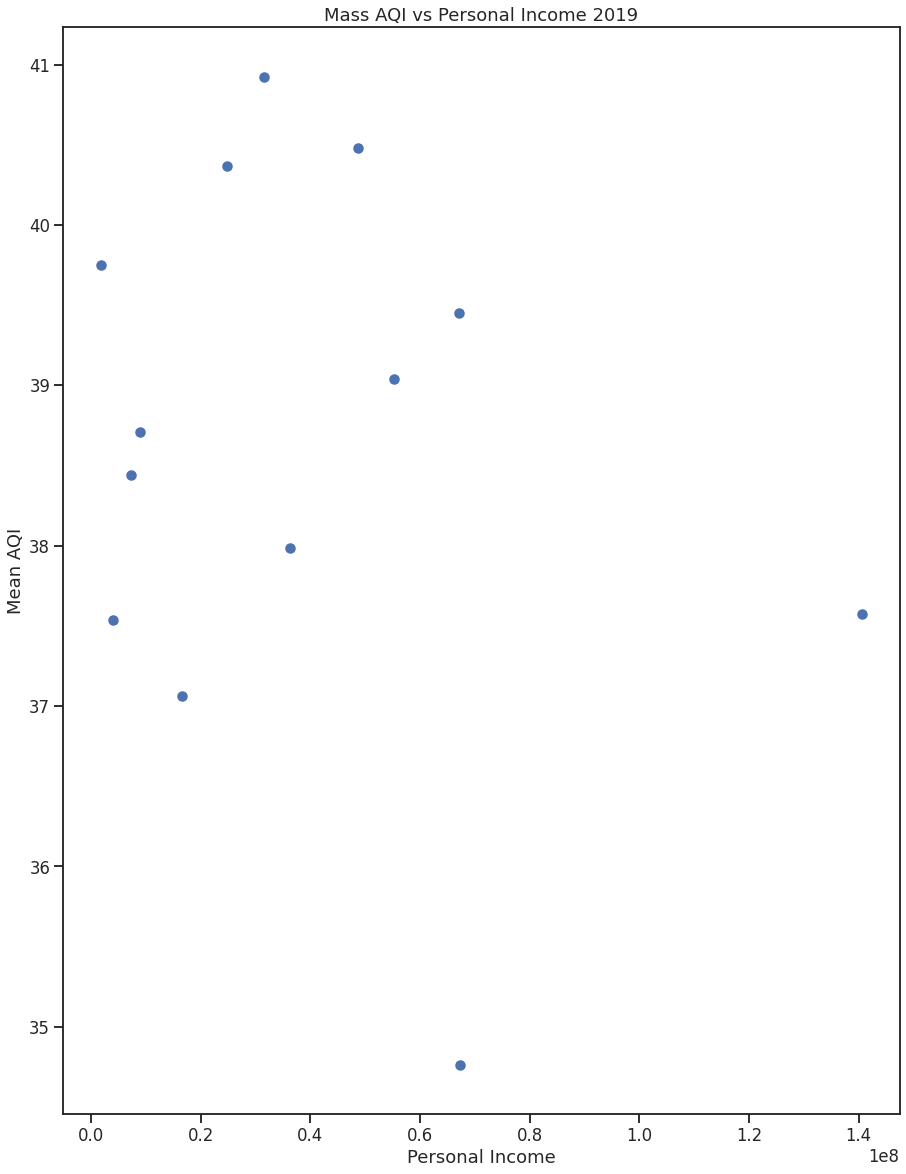

In [255]:
fig, ax = plt.subplots(figsize=(15,20))

plt.title('Mass AQI vs Personal Income 2019')
plt.xlabel('Personal Income')
plt.ylabel('Mean AQI')
ax = plt.scatter(df['2019_personal_income'], df['AQI'], label='Personal Income')

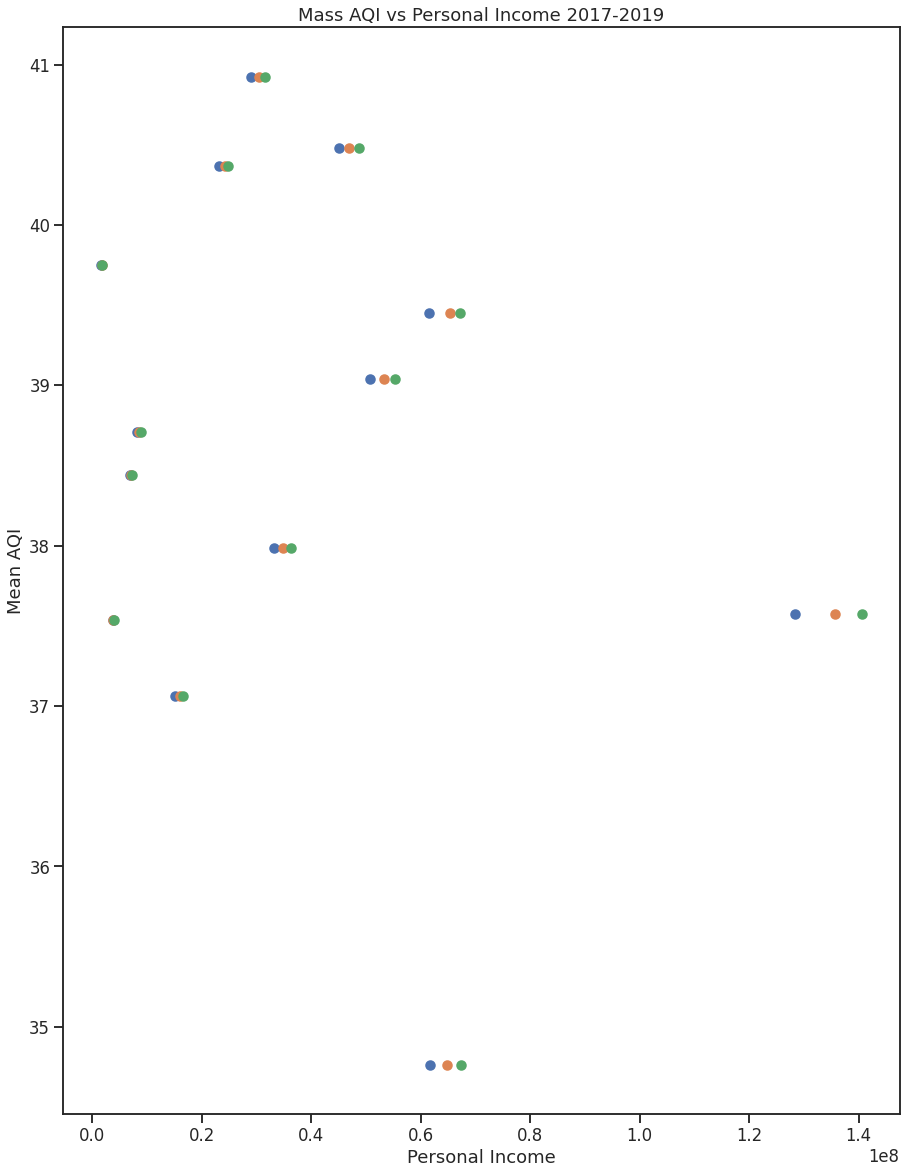

In [260]:
# all years personal income

fig, ax = plt.subplots(figsize=(15,20))

plt.title('Mass AQI vs Personal Income 2017-2019')
plt.xlabel('Personal Income')
plt.ylabel('Mean AQI')
ax = plt.scatter(df['2017_personal_income'], df['AQI'], label='Personal Income')
ax = plt.scatter(df['2018_personal_income'], df['AQI'], label='Personal Income')
ax = plt.scatter(df['2019_personal_income'], df['AQI'], label='Personal Income')

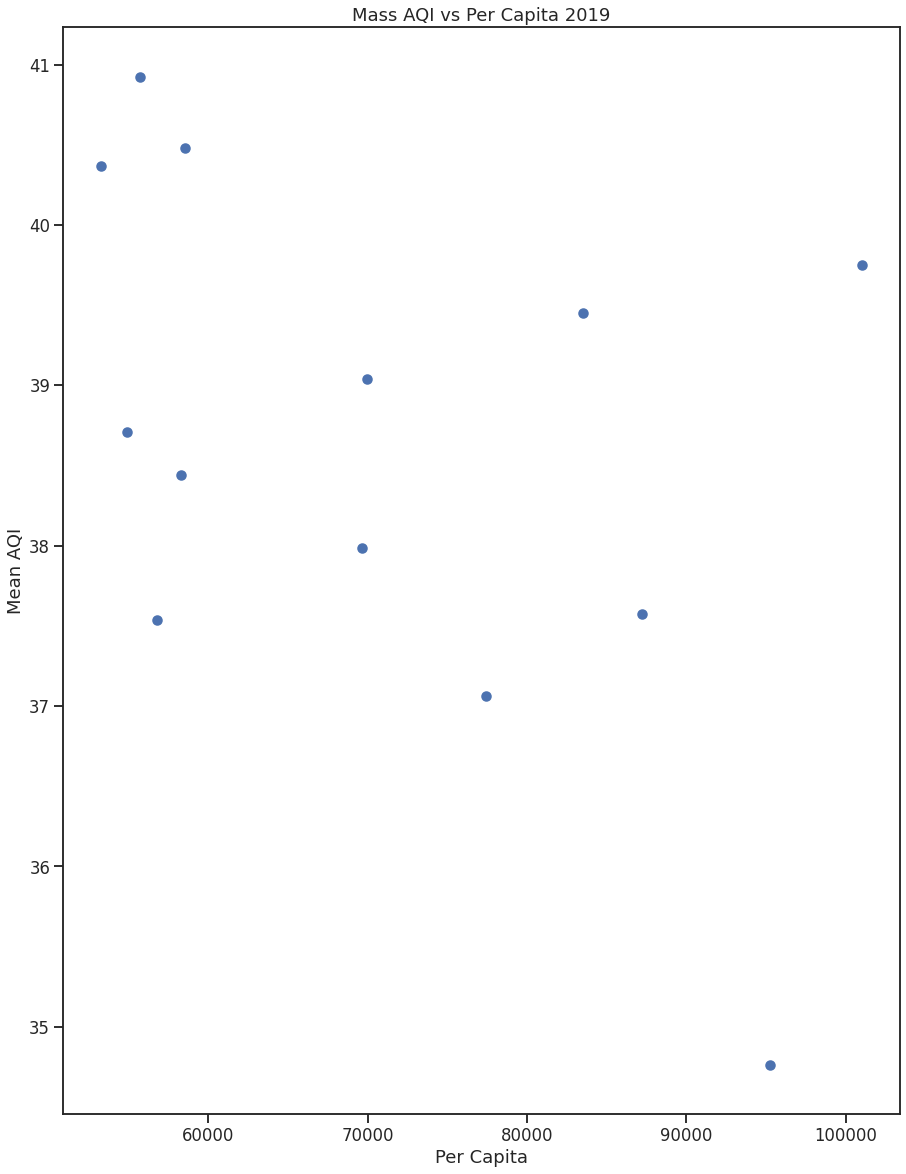

In [257]:
fig, ax = plt.subplots(figsize=(15,20))

plt.title('Mass AQI vs Per Capita 2019')
plt.xlabel('Per Capita')
plt.ylabel('Mean AQI')
ax = plt.scatter(df['2019_per_capita'], df['AQI'])


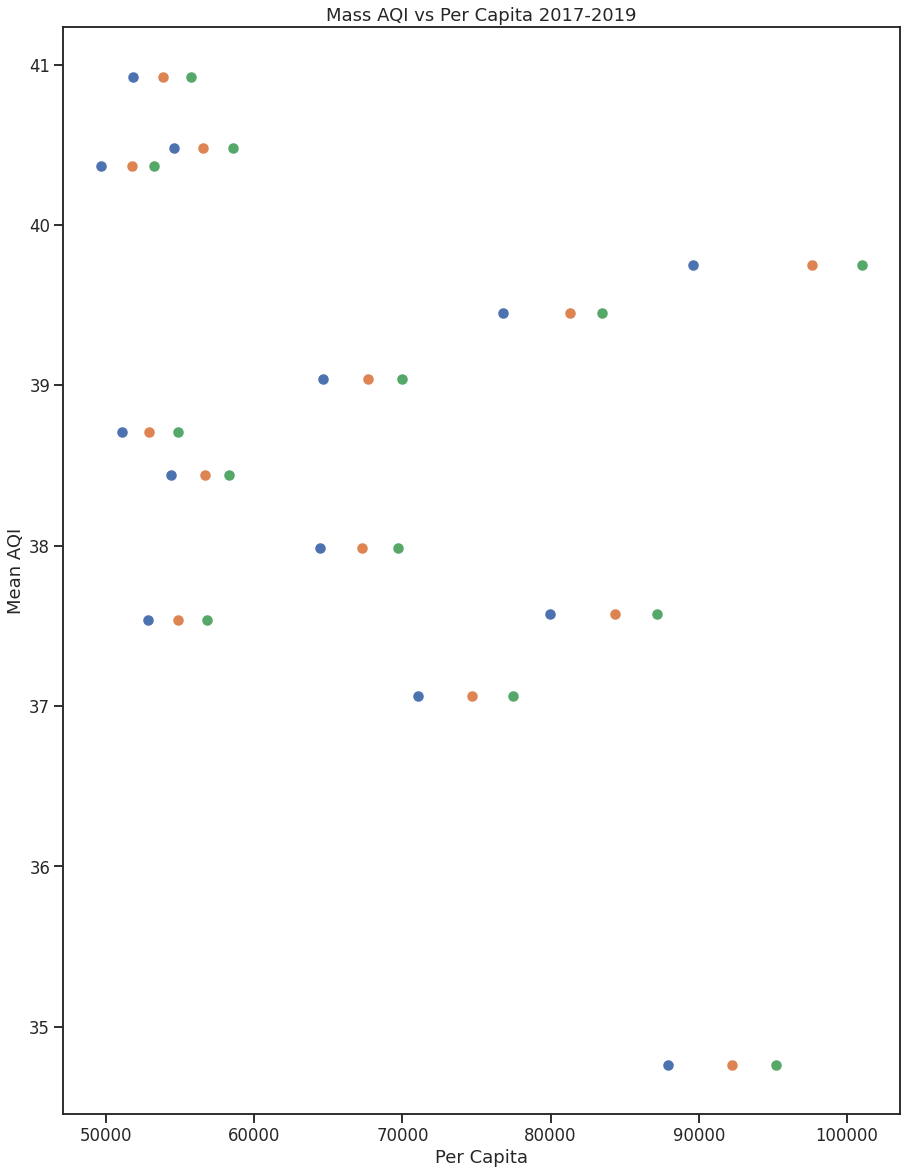

In [261]:
# all years per capita

fig, ax = plt.subplots(figsize=(15,20))

plt.title('Mass AQI vs Per Capita 2017-2019')
plt.xlabel('Per Capita')
plt.ylabel('Mean AQI')
ax = plt.scatter(df['2017_per_capita'], df['AQI'])
ax = plt.scatter(df['2018_per_capita'], df['AQI'])
ax = plt.scatter(df['2019_per_capita'], df['AQI'])

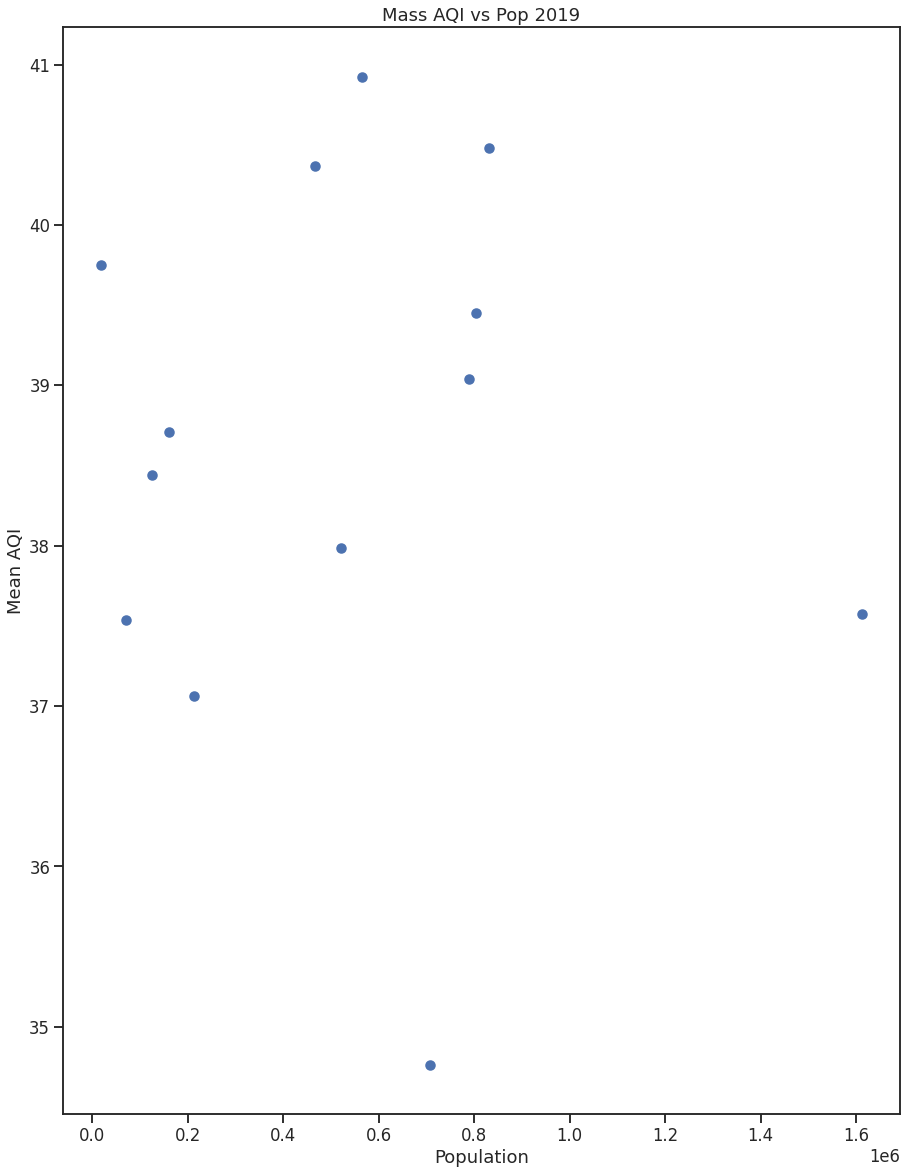

In [258]:
fig, ax = plt.subplots(figsize=(15,20))

plt.title('Mass AQI vs Pop 2019')
plt.xlabel('Population')
plt.ylabel('Mean AQI')
ax = plt.scatter(df['2019_pop'], df['AQI'])

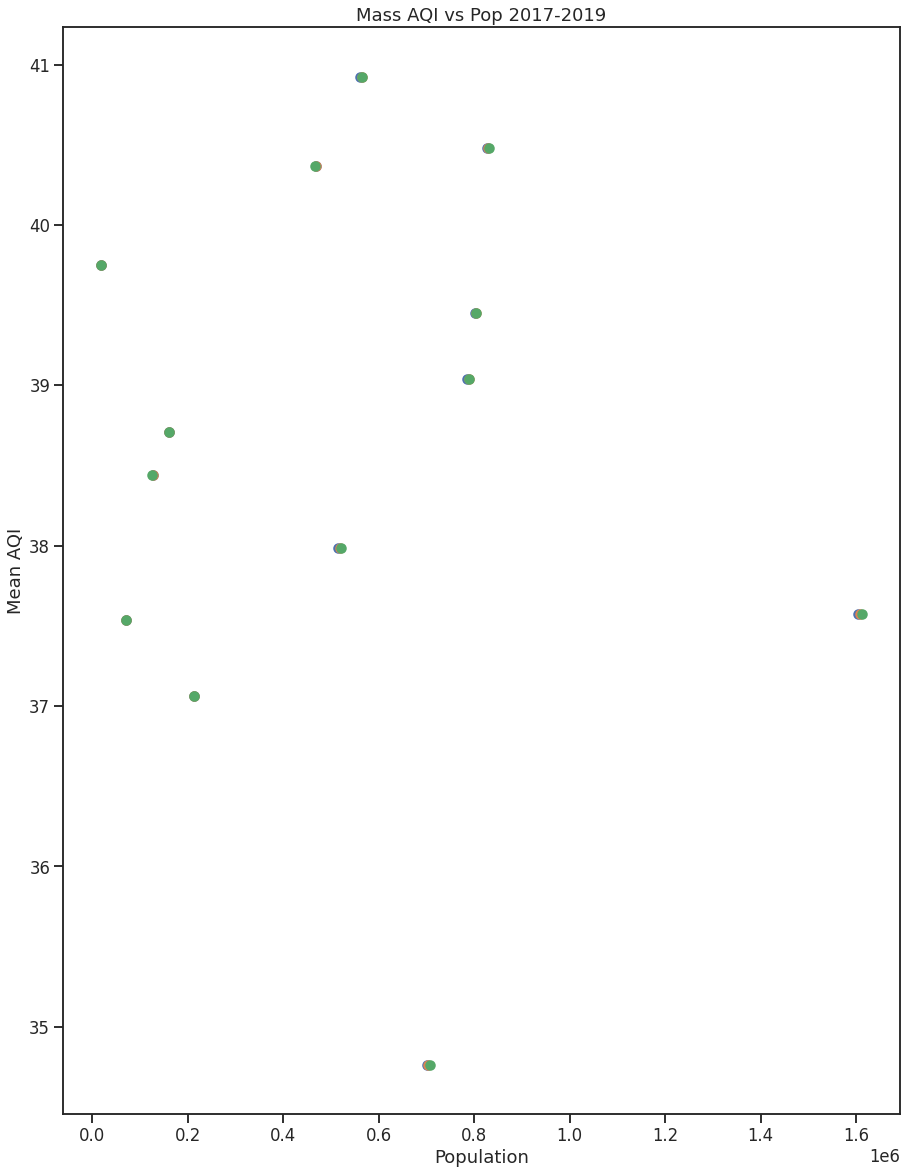

In [262]:
# all year per population

fig, ax = plt.subplots(figsize=(15,20))

plt.title('Mass AQI vs Pop 2017-2019')
plt.xlabel('Population')
plt.ylabel('Mean AQI')
ax = plt.scatter(df['2017_pop'], df['AQI'])
ax = plt.scatter(df['2018_pop'], df['AQI'])
ax = plt.scatter(df['2019_pop'], df['AQI'])


# Result from exploring mass incomes on mass AQI by county
* Even when population, per capita income, or personal income of a county in mass changes; the AQI remains relatively the same
* There appers to be no relation betwen the two variables